# Trabajo Final de Machine Learning 2024-2025:

Evaluation
* Not based on the obtained results (potentially different difficulties in the tackled problems)
* Quality of the deliverables
* Methodology employed
* Analysis of the dataset
* Use of appropriate metrics
* Use of different techniques
* Encounter problems and how they were solved (if any)
* Understanding the datasets and the obtained results
* Etc.

Fechas:
* Tuesday November 12th before 11.59pm -> Deliverables (via ADI or email)
* Thursday November 14th in class at 9.15am -> Presentation

## Datos:

El dataset que se ha utilizado para este trabajo se ha obtenido de Kaggle, concretamente de la siguiente página: [https://www.kaggle.com/datasets/wisam1985/advanced-iot-agriculture-2024/data](https://www.kaggle.com/datasets/wisam1985/advanced-iot-agriculture-2024/data)

El conjunto de datos "Advanced_IoT_Dataset.csv" consta de 30,000 registros y 14 columnas. A continuación se detallan las descripciones de cada columna:

1. Random: Identificador aleatorio (3 tipos: R1, R2, R3).
    * Identificador para cada registro, indicando probablemente una muestra o lote aleatorio.

2. Average of chlorophyll in the plant (ACHP): Promedio de clorofila en la planta.
    * Contenido promedio de clorofila en la planta. La clorofila es esencial para la fotosíntesis y su medición puede indicar la salud y eficiencia de la planta para convertir energía lumínica en energía química.

3. Plant height rate (PHR): Tasa de altura de la planta.
    * Tasa de crecimiento en altura de la planta, esencial para comprender la dinámica de crecimiento vertical de la planta a lo largo del tiempo.

4. Average wet weight of the growth vegetative (AWWGV): Peso húmedo promedio del crecimiento vegetativo.
    * Peso húmedo promedio de las partes vegetativas de la planta, que puede indicar el contenido de agua y la biomasa total del crecimiento vegetativo de la planta.

5. Average leaf area of the plant (ALAP): Área foliar promedio de la planta.
    * Área foliar promedio de la planta, un factor crucial para la fotosíntesis, ya que determina la superficie disponible para la absorción de luz.

6. Average number of plant leaves (ANPL): Número promedio de hojas de la planta.
    * Número promedio de hojas por planta, que puede correlacionarse con la capacidad de la planta para realizar fotosíntesis y su salud general.

7. Average root diameter (ARD): Diámetro promedio de la raíz.
    * Diámetro promedio de las raíces de la planta, que puede afectar la capacidad de la planta para absorber agua y nutrientes del suelo.

8. Average dry weight of the root (ADWR): Peso seco promedio de la raíz.
    * Peso seco promedio de las raíces de la planta, que mide la biomasa de la planta sin contenido de agua e indica la capacidad estructural y de almacenamiento de la raíz.

9. Percentage of dry matter for vegetative growth (PDMVG): Porcentaje de materia seca del crecimiento vegetativo.
    * Porcentaje de materia seca en las partes vegetativas de la planta, que indica la proporción de biomasa que no es agua y es crucial para comprender su estructura y estado nutricional.

10. Average root length (ARL): Longitud promedio de la raíz.
    * Longitud promedio de las raíces de la planta, que influye en la capacidad de la planta para explorar y absorber nutrientes y agua del suelo.

11. Average wet weight of the root (AWWR): Peso húmedo promedio de la raíz.
    * Peso húmedo promedio de las raíces de la planta, que incluye el contenido de agua e indica la biomasa total y la capacidad de retención de agua.

12. Average dry weight of vegetative plants (ADWV): Peso seco promedio de plantas vegetativas.
    * Peso seco promedio de las partes vegetativas de la planta, que refleja la biomasa estructural de la planta sin contenido de agua.

13. Percentage of dry matter for root growth (PDMRG): Porcentaje de materia seca para el crecimiento de la raíz.
    * Porcentaje de materia seca en las raíces de la planta, importante para evaluar la salud y función de las raíces.

14. Class: Clase o categoría a la que pertenece el registro de la planta.
    * Columna categórica que indica la clase o categoría del registro de la planta, lo cual puede representar diferentes grupos o condiciones bajo las cuales las plantas fueron estudiadas o clasificadas.

In [2]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore")

In [160]:
raw_data = pd.read_csv('DatasetML/Advanced_IoT_Dataset.csv')

raw_data.head(5)


Random   Average  of chlorophyll in the plant (ACHP)  \
0     R1                                     34.533468   
1     R1                                     34.489028   
2     R2                                     33.100405   
3     R1                                     34.498319   
4     R3                                     36.297008   

    Plant height rate (PHR)  \
0                 54.566983   
1                 54.567692   
2                 67.067344   
3                 54.559049   
4                 45.588894   

   Average wet weight of the growth vegetative (AWWGV)  \
0                                           1.147449     
1                                           1.149530     
2                                           1.104647     
3                                           1.137759     
4                                           1.363205     

   Average leaf area of the plant (ALAP)  \
0                            1284.229549   
1                            1284.247744   
2                            1009.208996   
3                            1284.227623   
4                             981.470310   

   Average number of plant leaves (ANPL)  Average root diameter (ARD)  \
0                               4.999713                    16.274918   
1                               5.024259                    16.269452   
2                               5.007652                    15.980760   
3                               4.991501                    16.276710   
4                               4.003682                    16.979894   

    Average dry weight of the root (ADWR)  \
0                                1.706810   
1                                1.700930   
2                                1.185391   
3                                1.716396   
4                                0.777428   

    Percentage of dry matter for vegetative growth (PDMVG)  \
0                                          18.399982         
1                                          18.398289         
2                                          19.398789         
3                                          18.413613         
4                                          31.423772         

   Average root length (ARL)  Average wet weight of the root (AWWR)  \
0                  19.739037                               2.949240   
1                  19.758836                               2.943137   
2                  20.840822                               2.861635   
3                  19.736098                               2.946784   
4                  17.331894                               2.766242   

    Average dry weight of vegetative plants (ADWV)  \
0                                         0.209251   
1                                         0.216154   
2                                         0.200113   
3                                         0.223092   
4                                         0.424172   

   Percentage of dry matter for root growth (PDMRG) Class  
0                                         57.633906    SA  
1                                         57.633697    SA  
2                                         41.289875    SA  
3                                         57.645661    SA  
4                                         27.898619    SA

In [4]:
raw_data.describe()

Average  of chlorophyll in the plant (ACHP)   Plant height rate (PHR)  \
count                                  30000.000000              30000.000000   
mean                                      38.060575                 59.020331   
std                                        4.441682                 11.985213   
min                                       32.664004                 37.020398   
25%                                       34.399604                 51.059436   
50%                                       36.575753                 55.912058   
75%                                       42.300836                 67.069465   
max                                       46.431668                 77.040610   

       Average wet weight of the growth vegetative (AWWGV)  \
count                                       30000.000000     
mean                                            1.247257     
std                                             0.245989     
min                                             0.848351     
25%                                             1.064865     
50%                                             1.211328     
75%                                             1.501692     
max                                             1.775383     

       Average leaf area of the plant (ALAP)  \
count                           30000.000000   
mean                             1063.639833   
std                               260.712823   
min                               658.488225   
25%                               875.501356   
50%                              1009.249081   
75%                              1243.866525   
max                              1751.031654   

       Average number of plant leaves (ANPL)  Average root diameter (ARD)  \
count                           30000.000000                 30000.000000   
mean                                3.944789                    16.285792   
std                                 0.702537                     2.882793   
min                                 2.959173                    11.075737   
25%                                 3.013099                    13.933350   
50%                                 3.998577                    16.248496   
75%                                 4.015829                    18.202577   
max                                 5.037358                    23.325870   

        Average dry weight of the root (ADWR)  \
count                            30000.000000   
mean                                 1.000981   
std                                  0.456292   
min                                  0.241972   
25%                                  0.675892   
50%                                  0.833799   
75%                                  1.313504   
max                                  2.196556   

        Percentage of dry matter for vegetative growth (PDMVG)  \
count                                       30000.000000         
mean                                           22.674553         
std                                             9.571091         
min                                             8.021505         
25%                                            14.980983         
50%                                            21.954006         
75%                                            27.711471         
max                                            43.660373         

       Average root length (ARL)  Average wet weight of the root (AWWR)  \
count               30000.000000                           30000.000000   
mean                   18.071061                               2.907011   
std                     2.932830                               1.361928   
min                    12.359924                               1.126715   
25%                    15.600294                               1.911408   
50%                    18.477019                               2.818611   
75%                    20.3652

<Figure size 1200x1200 with 0 Axes>

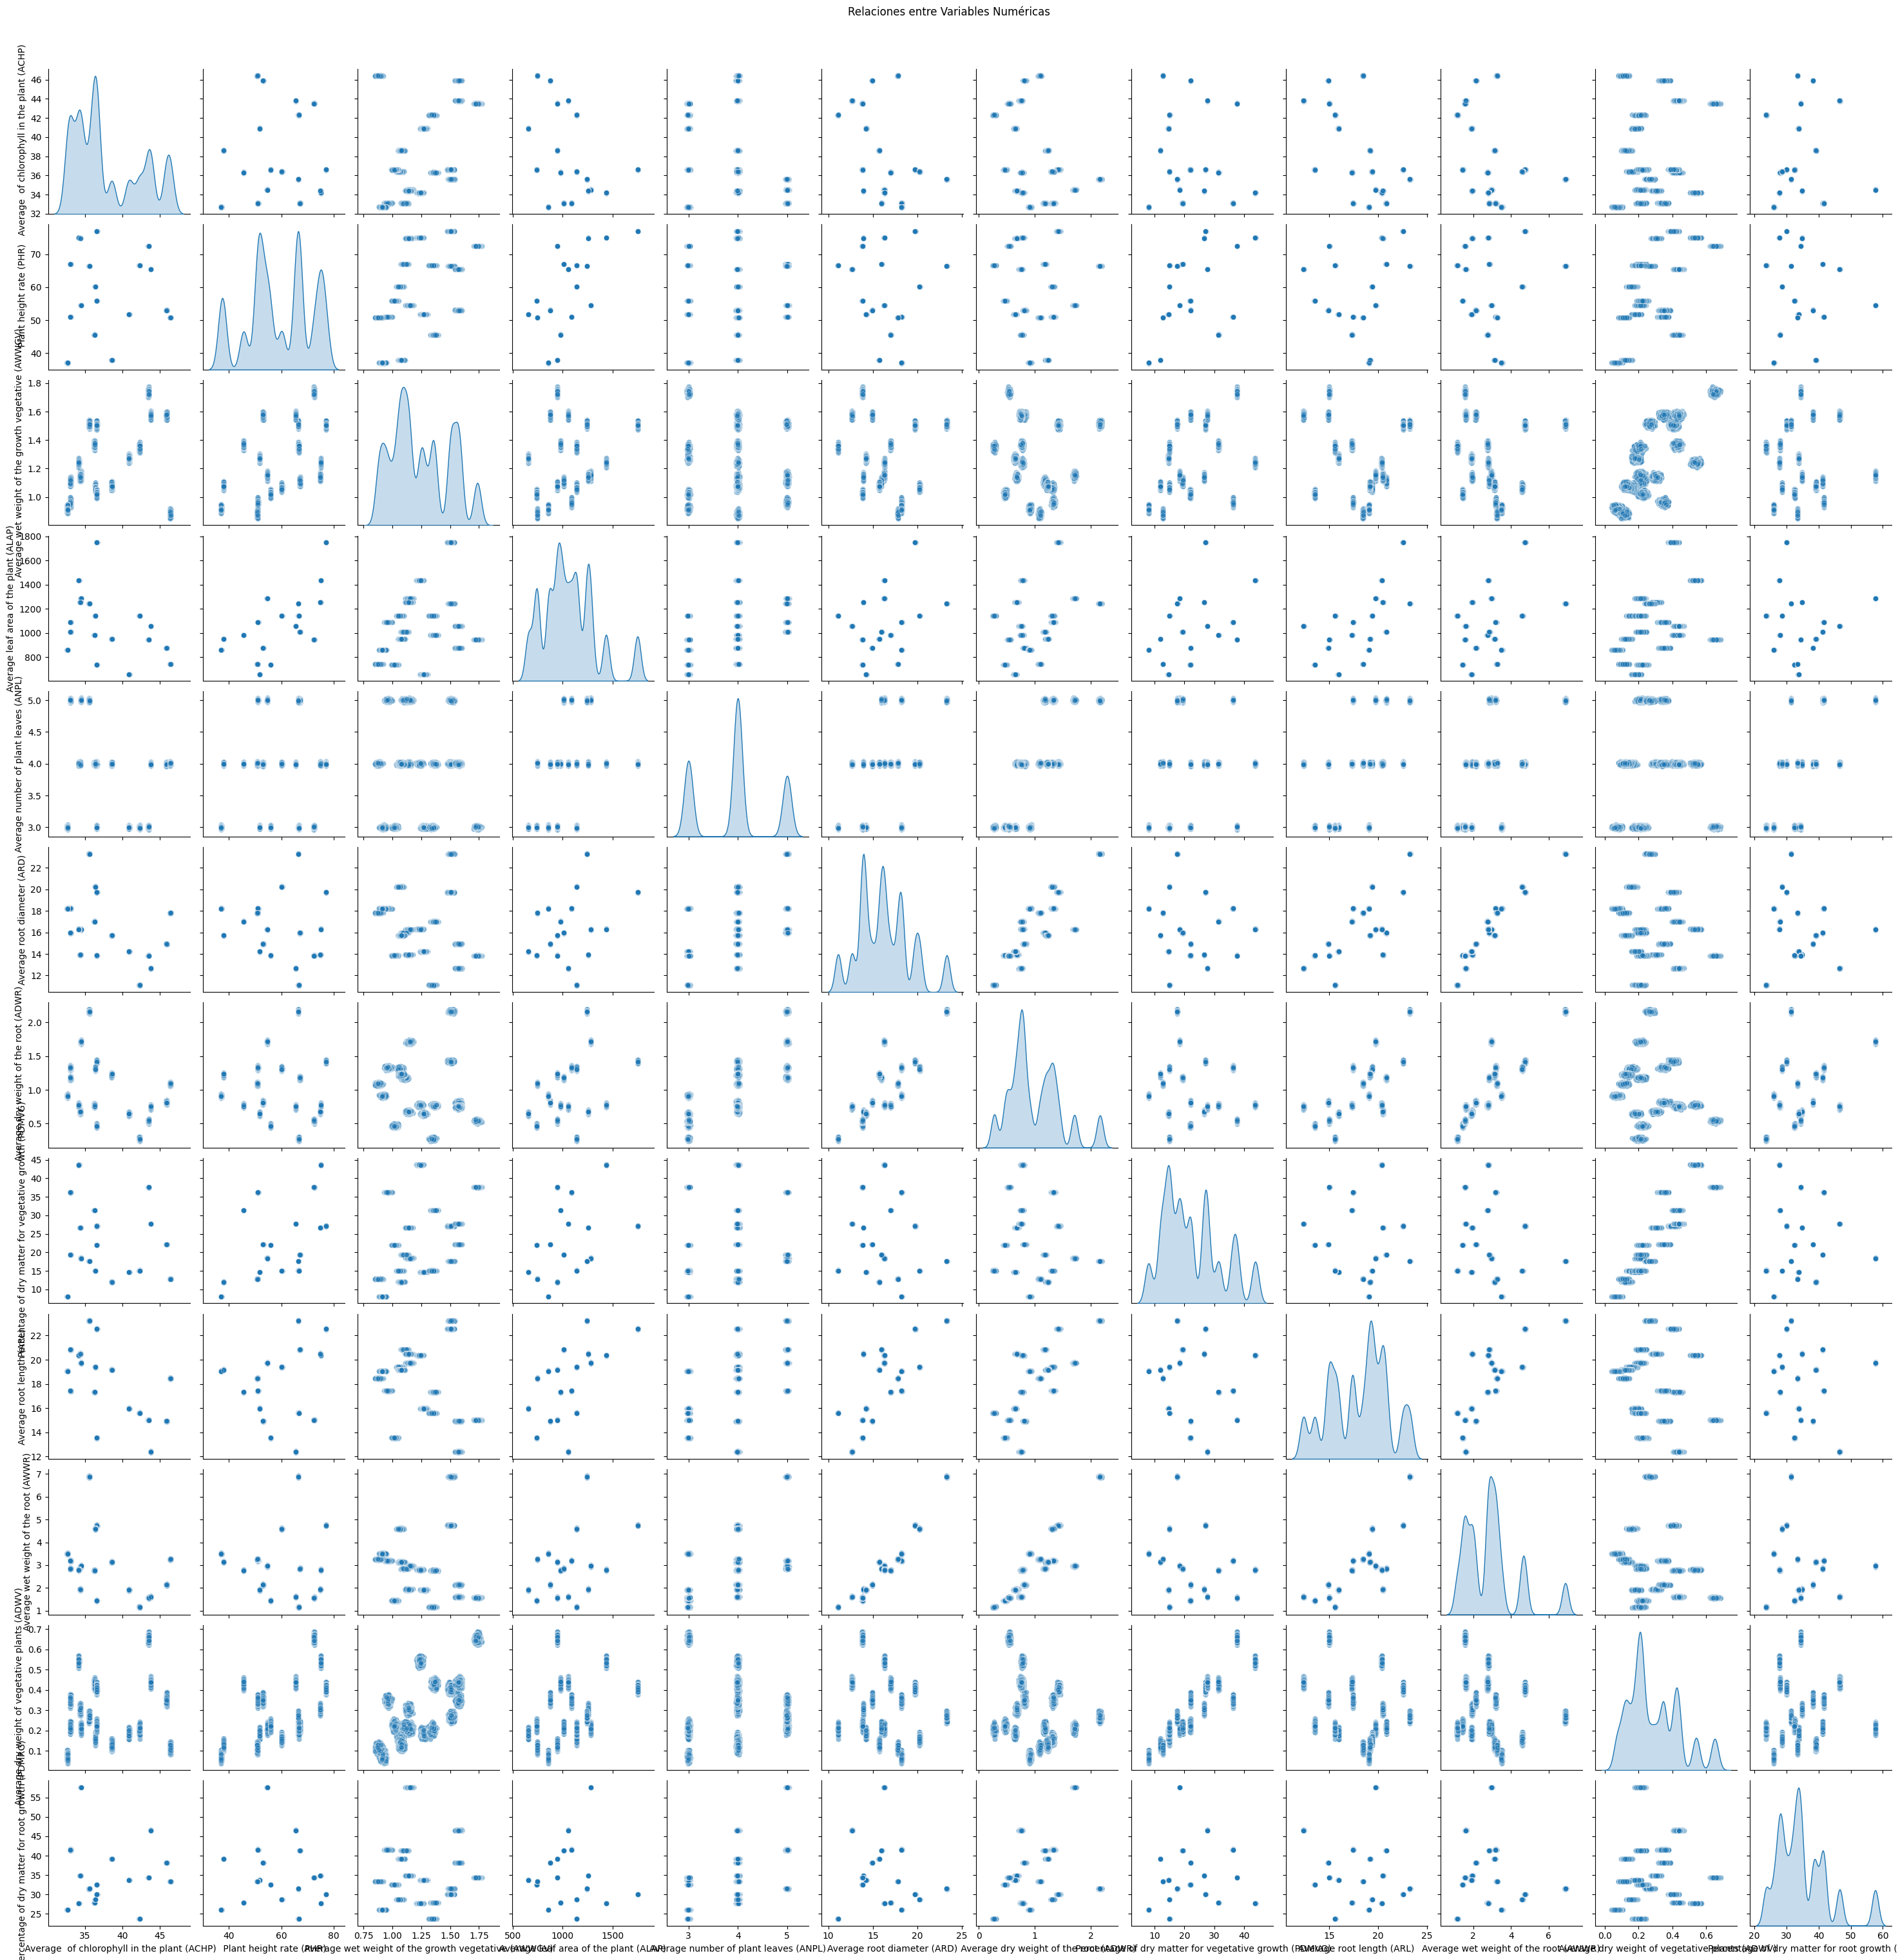

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de pares para todas las variables numéricas
plt.figure(figsize=(12, 12))
sns.pairplot(raw_data, diag_kind='kde', plot_kws={'alpha': 0.5})

plt.suptitle("Relaciones entre Variables Numéricas", y=1.02)
plt.show()


<Figure size 1200x1200 with 0 Axes>

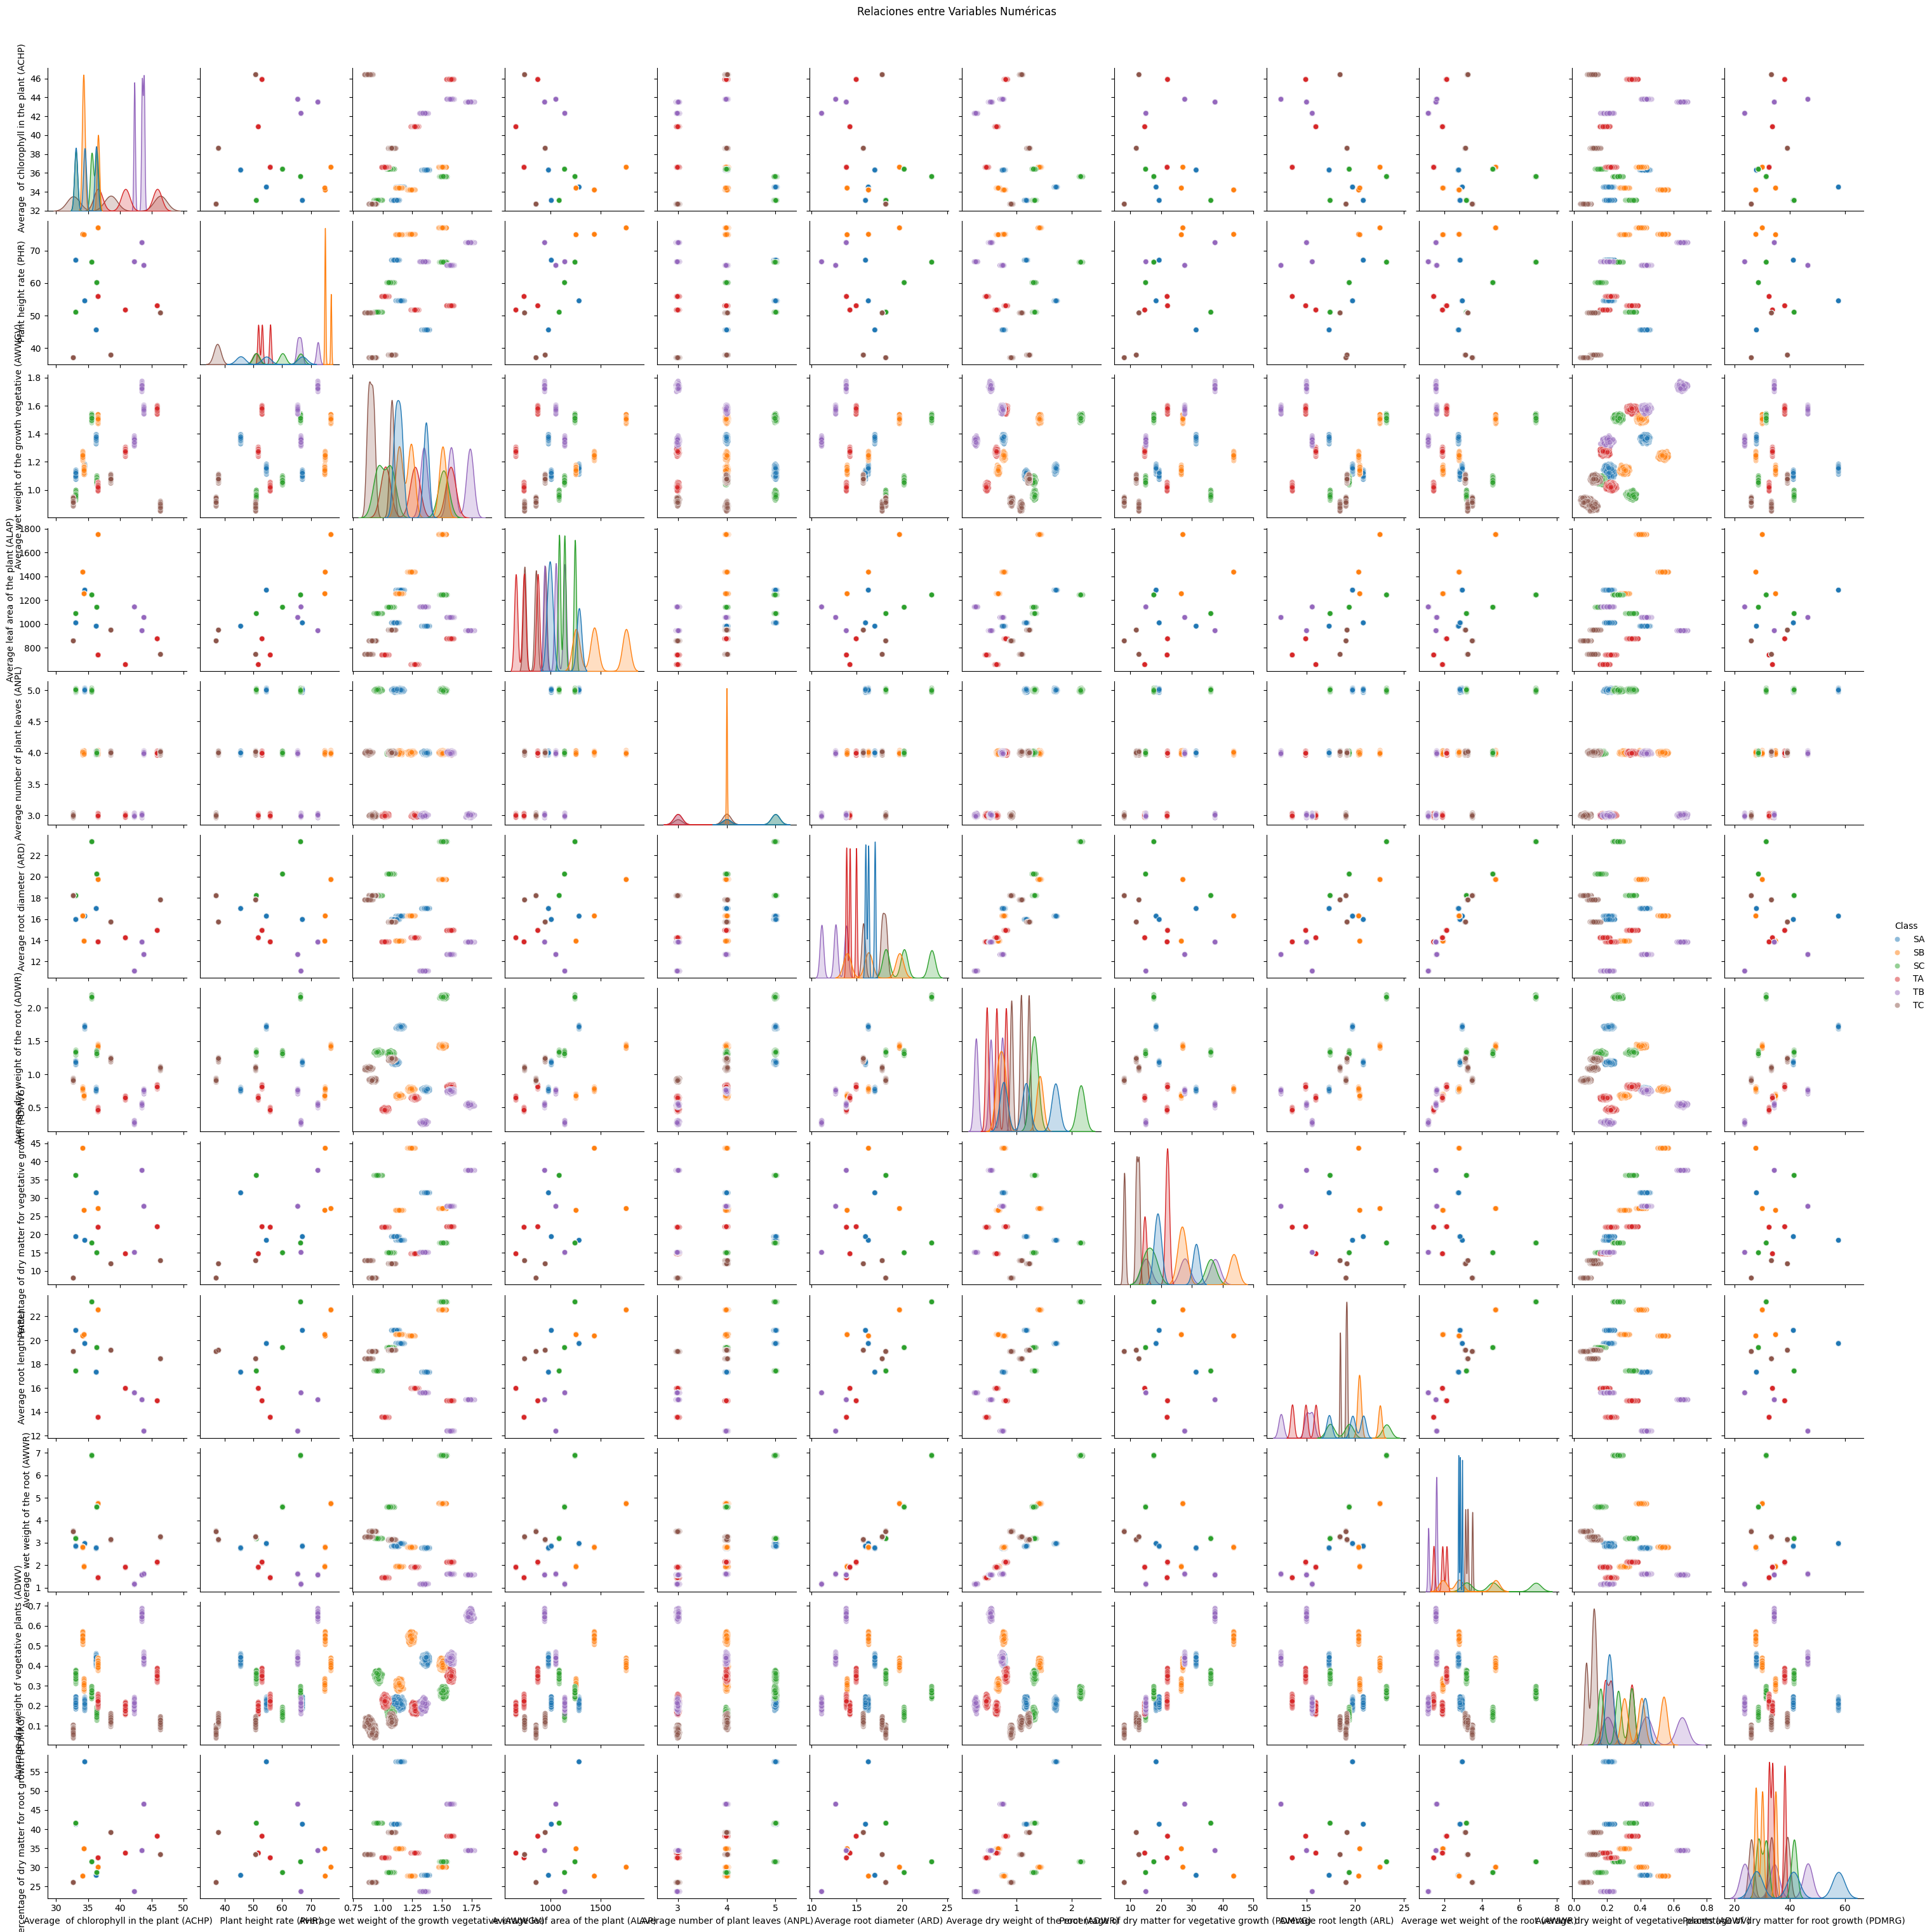

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de pares para todas las variables numéricas
plt.figure(figsize=(12, 12))
sns.pairplot(raw_data, diag_kind='kde', plot_kws={'alpha': 0.5}, hue='Class')

plt.suptitle("Relaciones entre Variables Numéricas", y=1.02)
plt.show()


<Figure size 1200x1200 with 0 Axes>

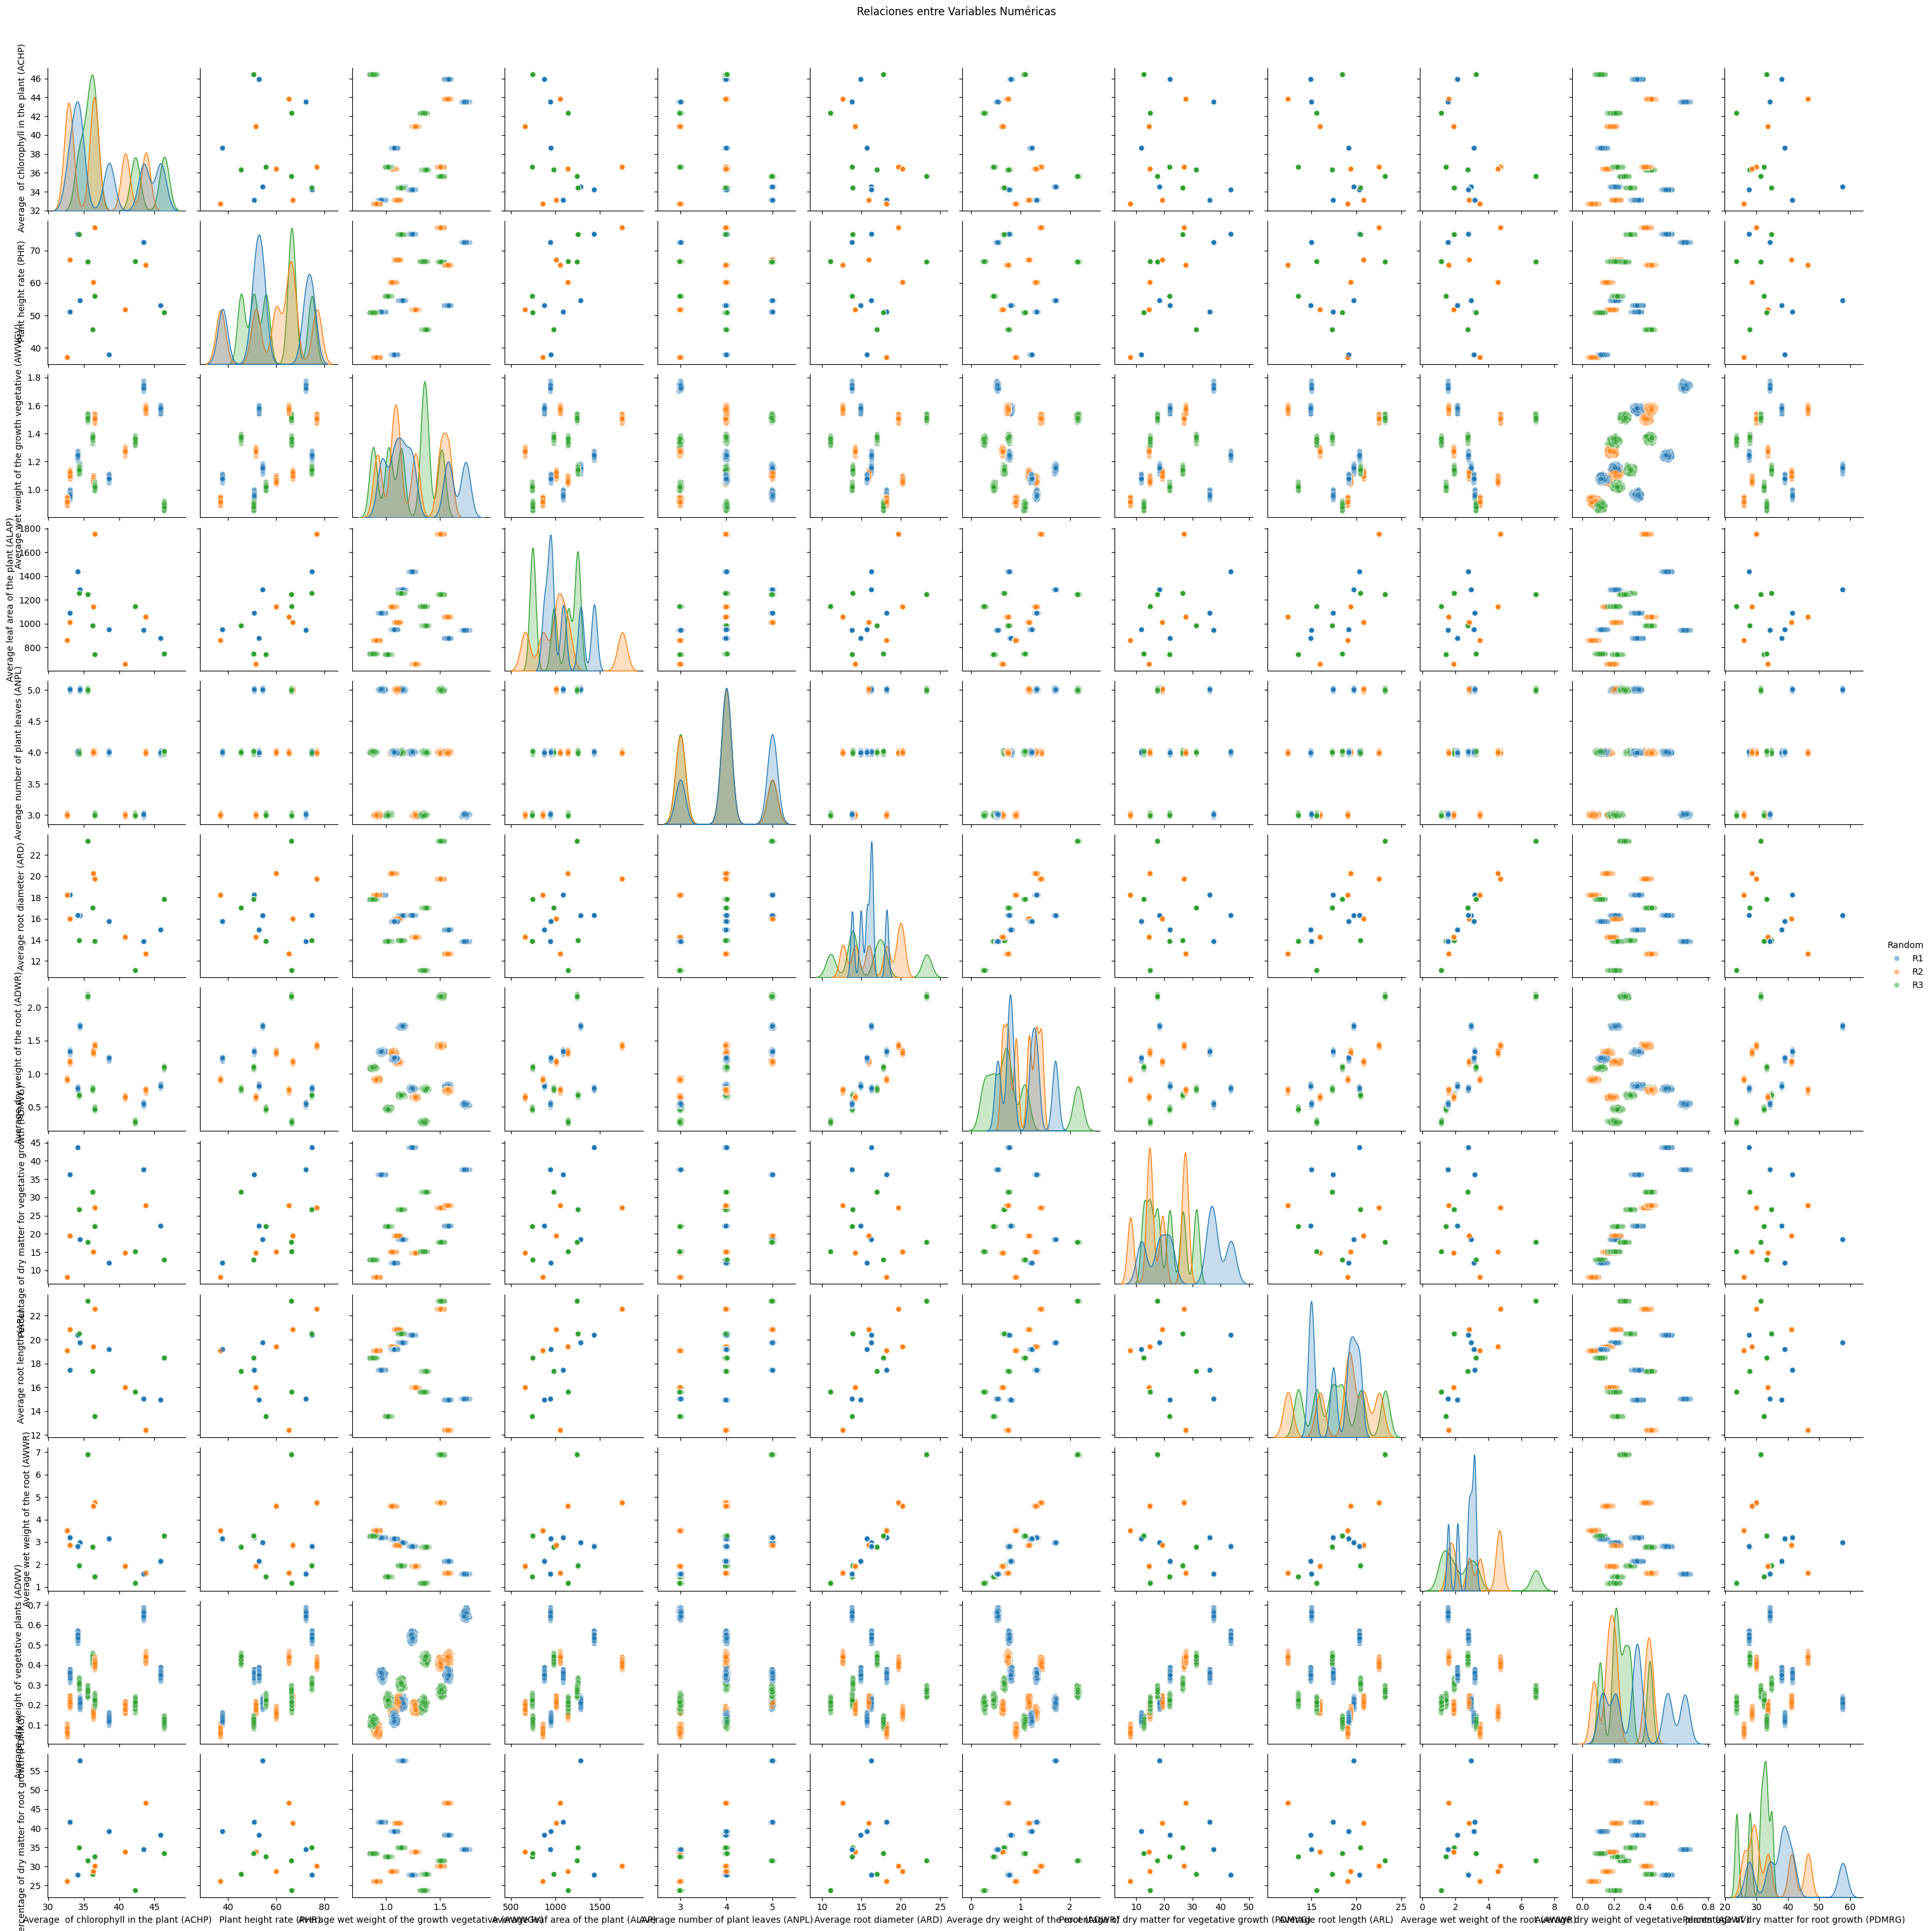

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de pares para todas las variables numéricas
plt.figure(figsize=(12, 12))
sns.pairplot(raw_data, diag_kind='kde', plot_kws={'alpha': 0.5}, hue='Random')

plt.suptitle("Relaciones entre Variables Numéricas", y=1.02)
plt.show()

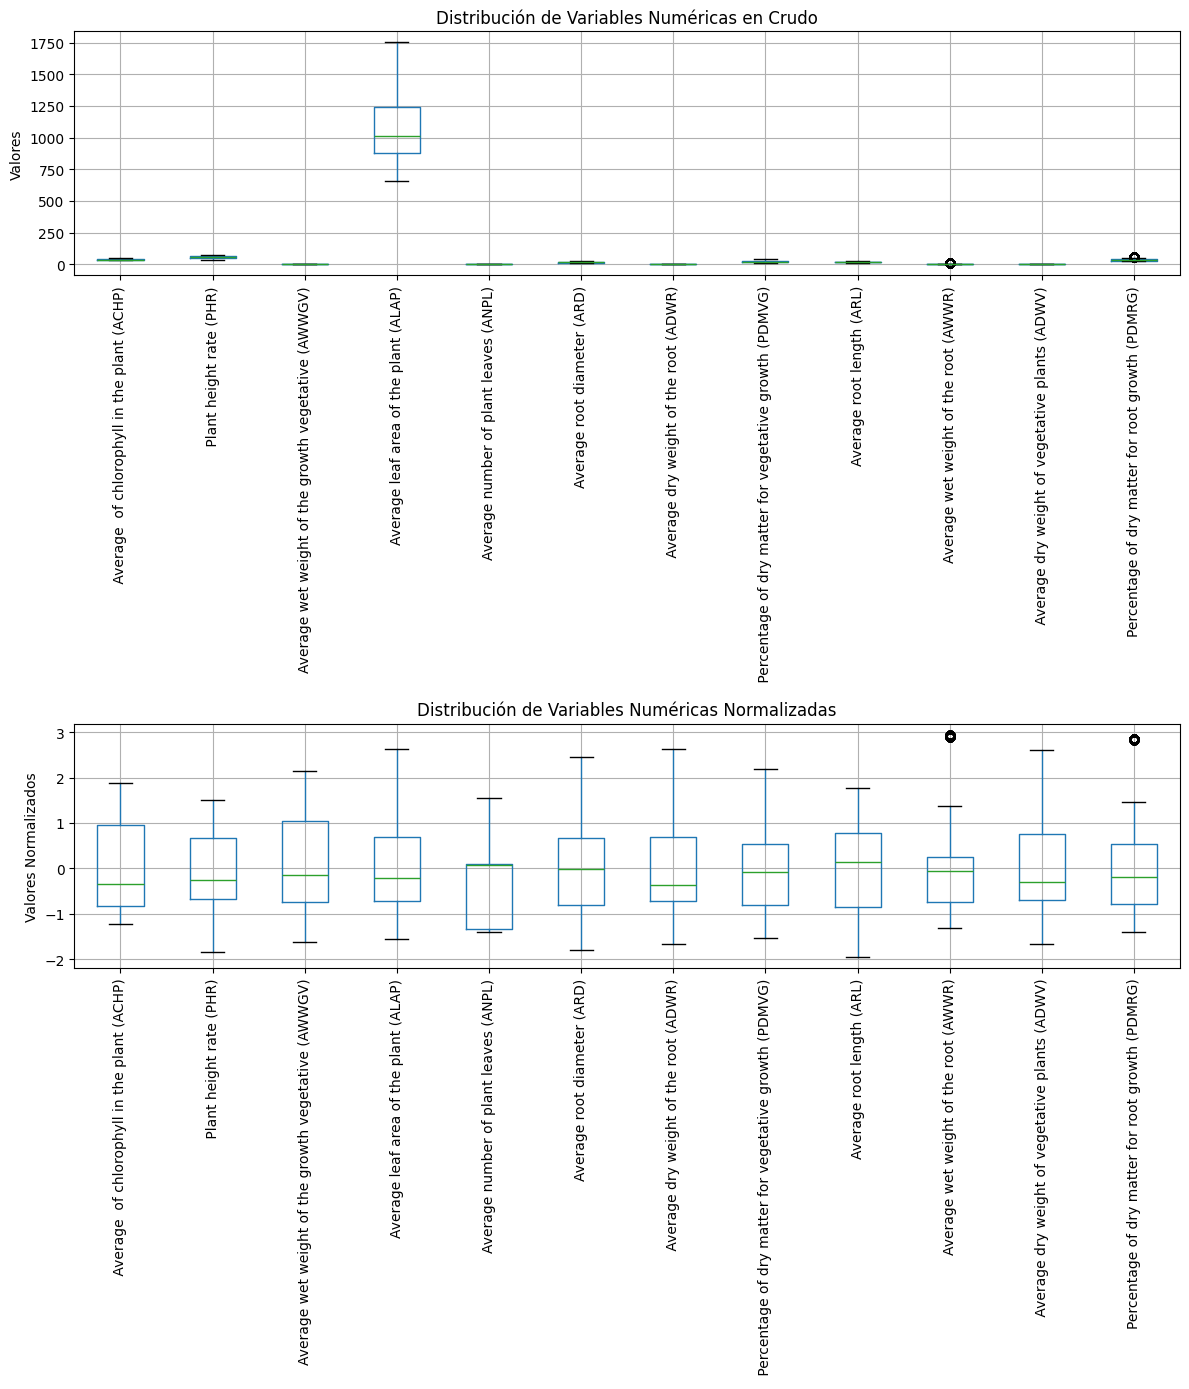

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

numeric_columns = raw_data.describe().columns  # Seleccionar las columnas numéricas a partir de describe()

# Normalizar los datos
scaler = StandardScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(raw_data[numeric_columns]), columns=numeric_columns)

# Crear subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 14))

# Gráfico boxplot con datos en crudo
raw_data[numeric_columns].boxplot(ax=axs[0])
axs[0].set_title("Distribución de Variables Numéricas en Crudo")
axs[0].set_xticklabels(numeric_columns, rotation=90)
axs[0].set_ylabel("Valores")
axs[0].grid(True)
#axs[0].set_ylim(-200, 800)

# Gráfico boxplot con datos normalizados
data_normalized.boxplot(ax=axs[1])
axs[1].set_title("Distribución de Variables Numéricas Normalizadas")
axs[1].set_xticklabels(numeric_columns, rotation=90)
axs[1].set_ylabel("Valores Normalizados")
axs[1].grid(True)
#axs[1].set_ylim(-10, 10) #Se han cortado muchos outliers 

# Ajustar el layout
plt.tight_layout()
plt.show()

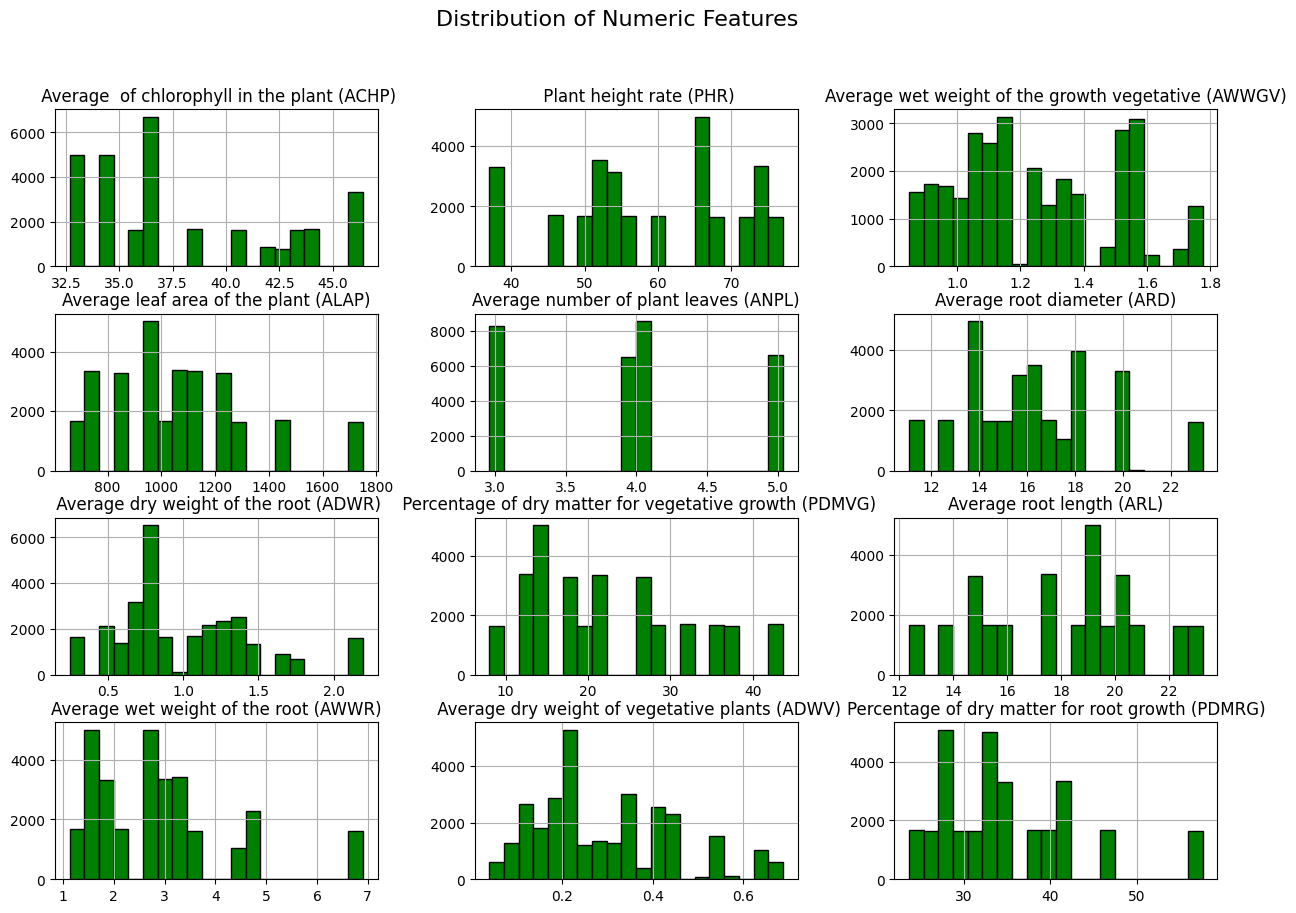

In [9]:
raw_data[numeric_columns].hist(bins=20, figsize=(15, 10), color='Green', edgecolor='black')
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.show()

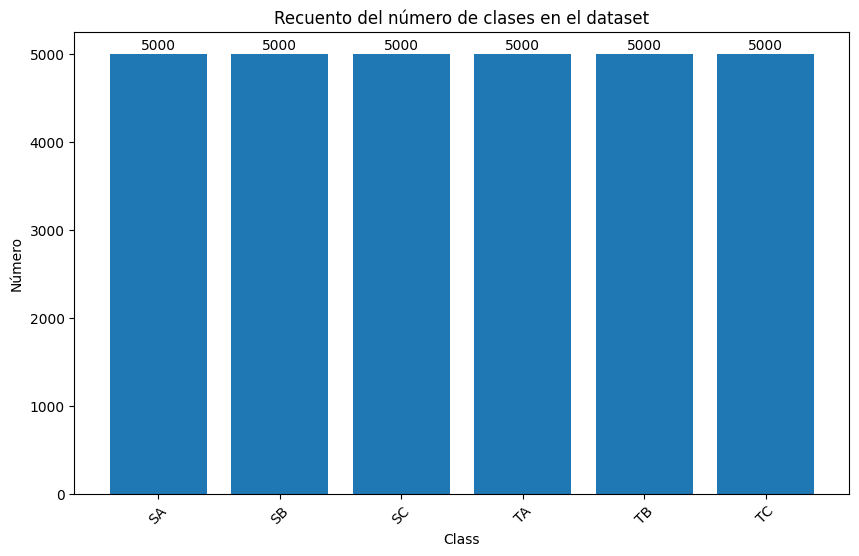

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar la cantidad de registros en cada clase
class_counts = raw_data['Class'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.index, class_counts.values)

# Añadir etiquetas encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

# Etiquetas y título
plt.xlabel("Class")
plt.ylabel("Número")
plt.title("Recuento del número de clases en el dataset")
plt.xticks(rotation=45)
plt.show()


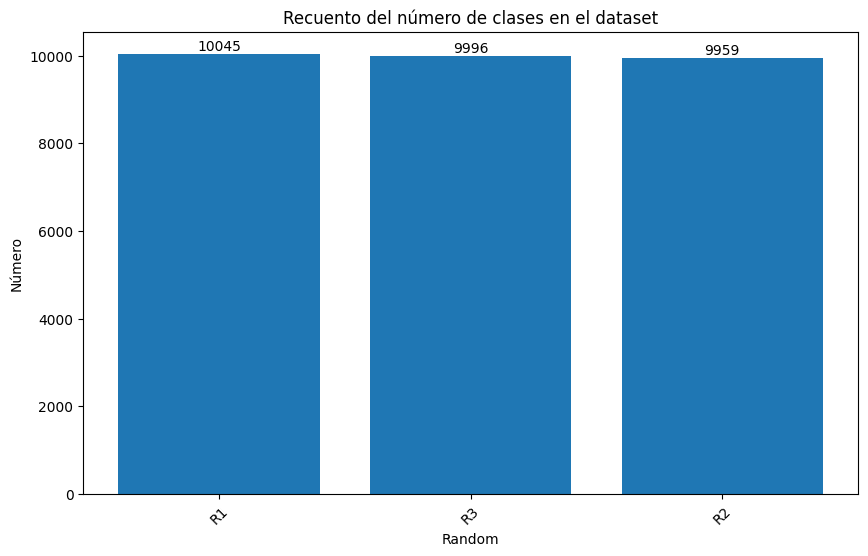

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar la cantidad de registros en cada clase
class_counts = raw_data['Random'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.index, class_counts.values)

# Añadir etiquetas encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

# Etiquetas y título
plt.xlabel("Random")
plt.ylabel("Número")
plt.title("Recuento del número de clases en el dataset")
plt.xticks(rotation=45)
plt.show()


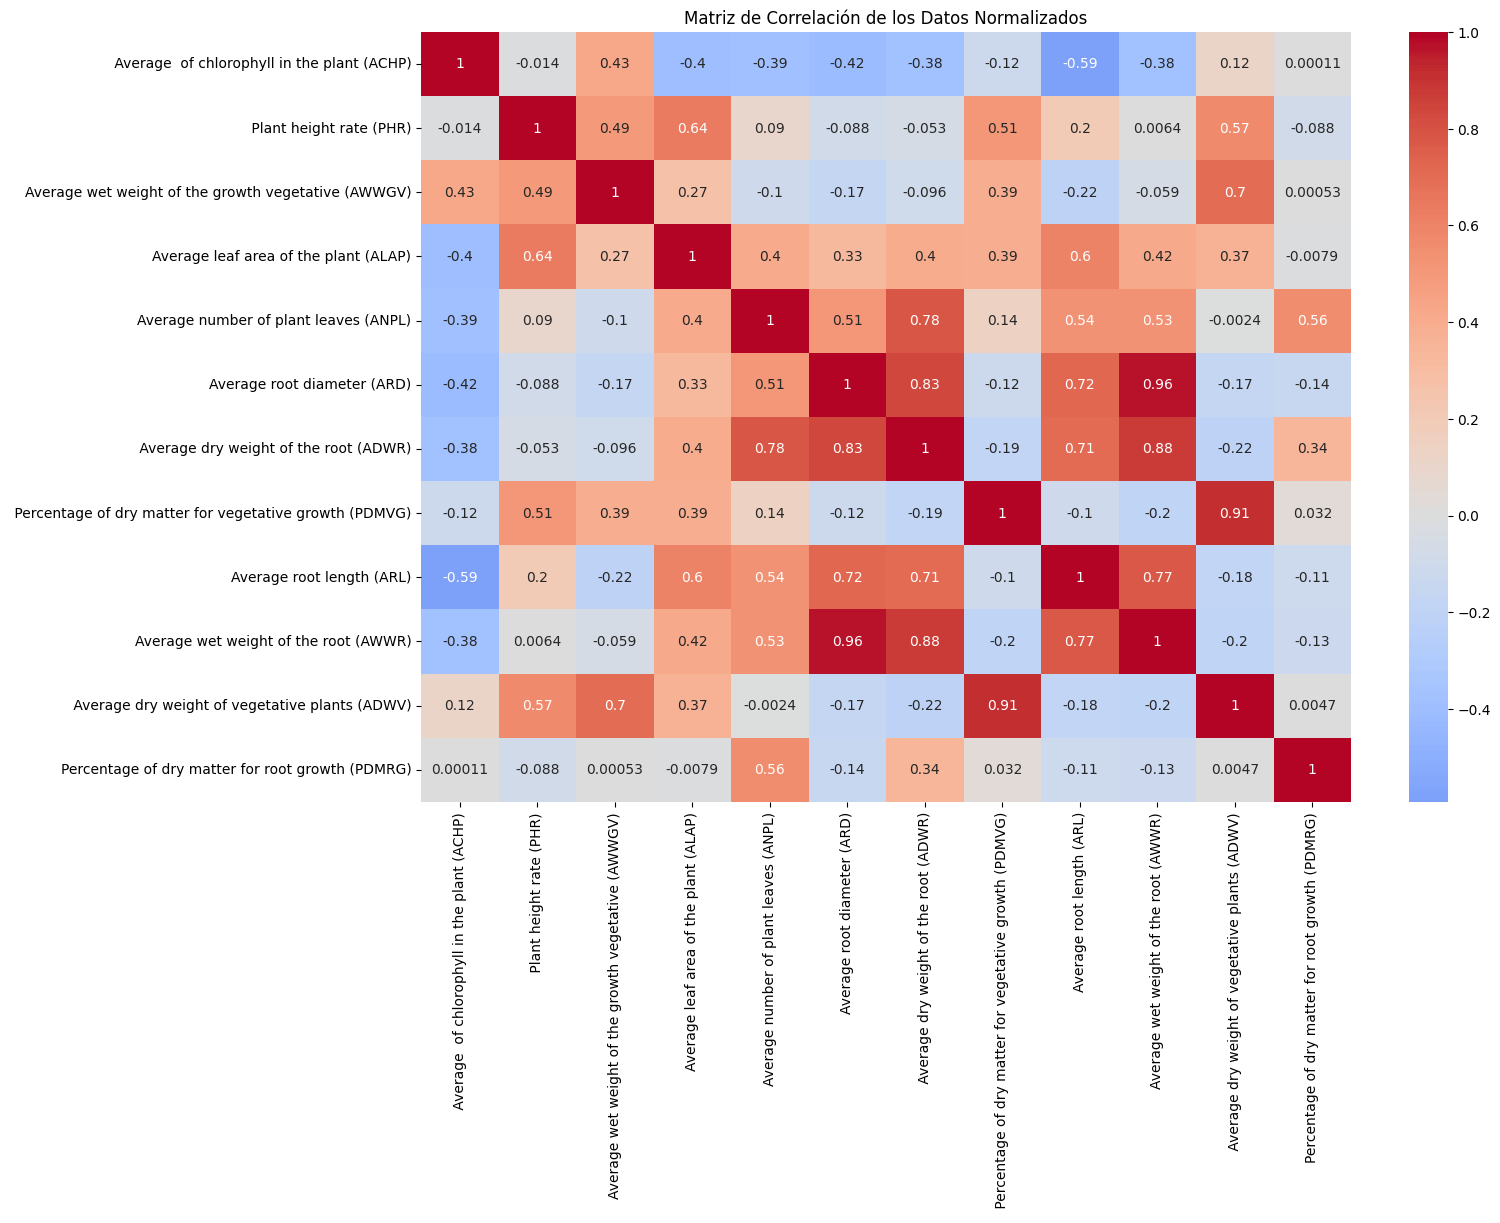

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Filtrar solo las columnas numéricas
numerical_data = raw_data.select_dtypes(include=['float64', 'int64'])

# Normalizar los datos (usando StandardScaler para estandarización)
scaler = StandardScaler()
numerical_data_normalized = scaler.fit_transform(numerical_data)

# Crear un DataFrame de los datos normalizados, usando los mismos nombres de columnas
numerical_data_normalized = pd.DataFrame(numerical_data_normalized, columns=numerical_data.columns)

# Calcular la matriz de correlación
correlation_matrix = numerical_data_normalized.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación de los Datos Normalizados")
plt.show()


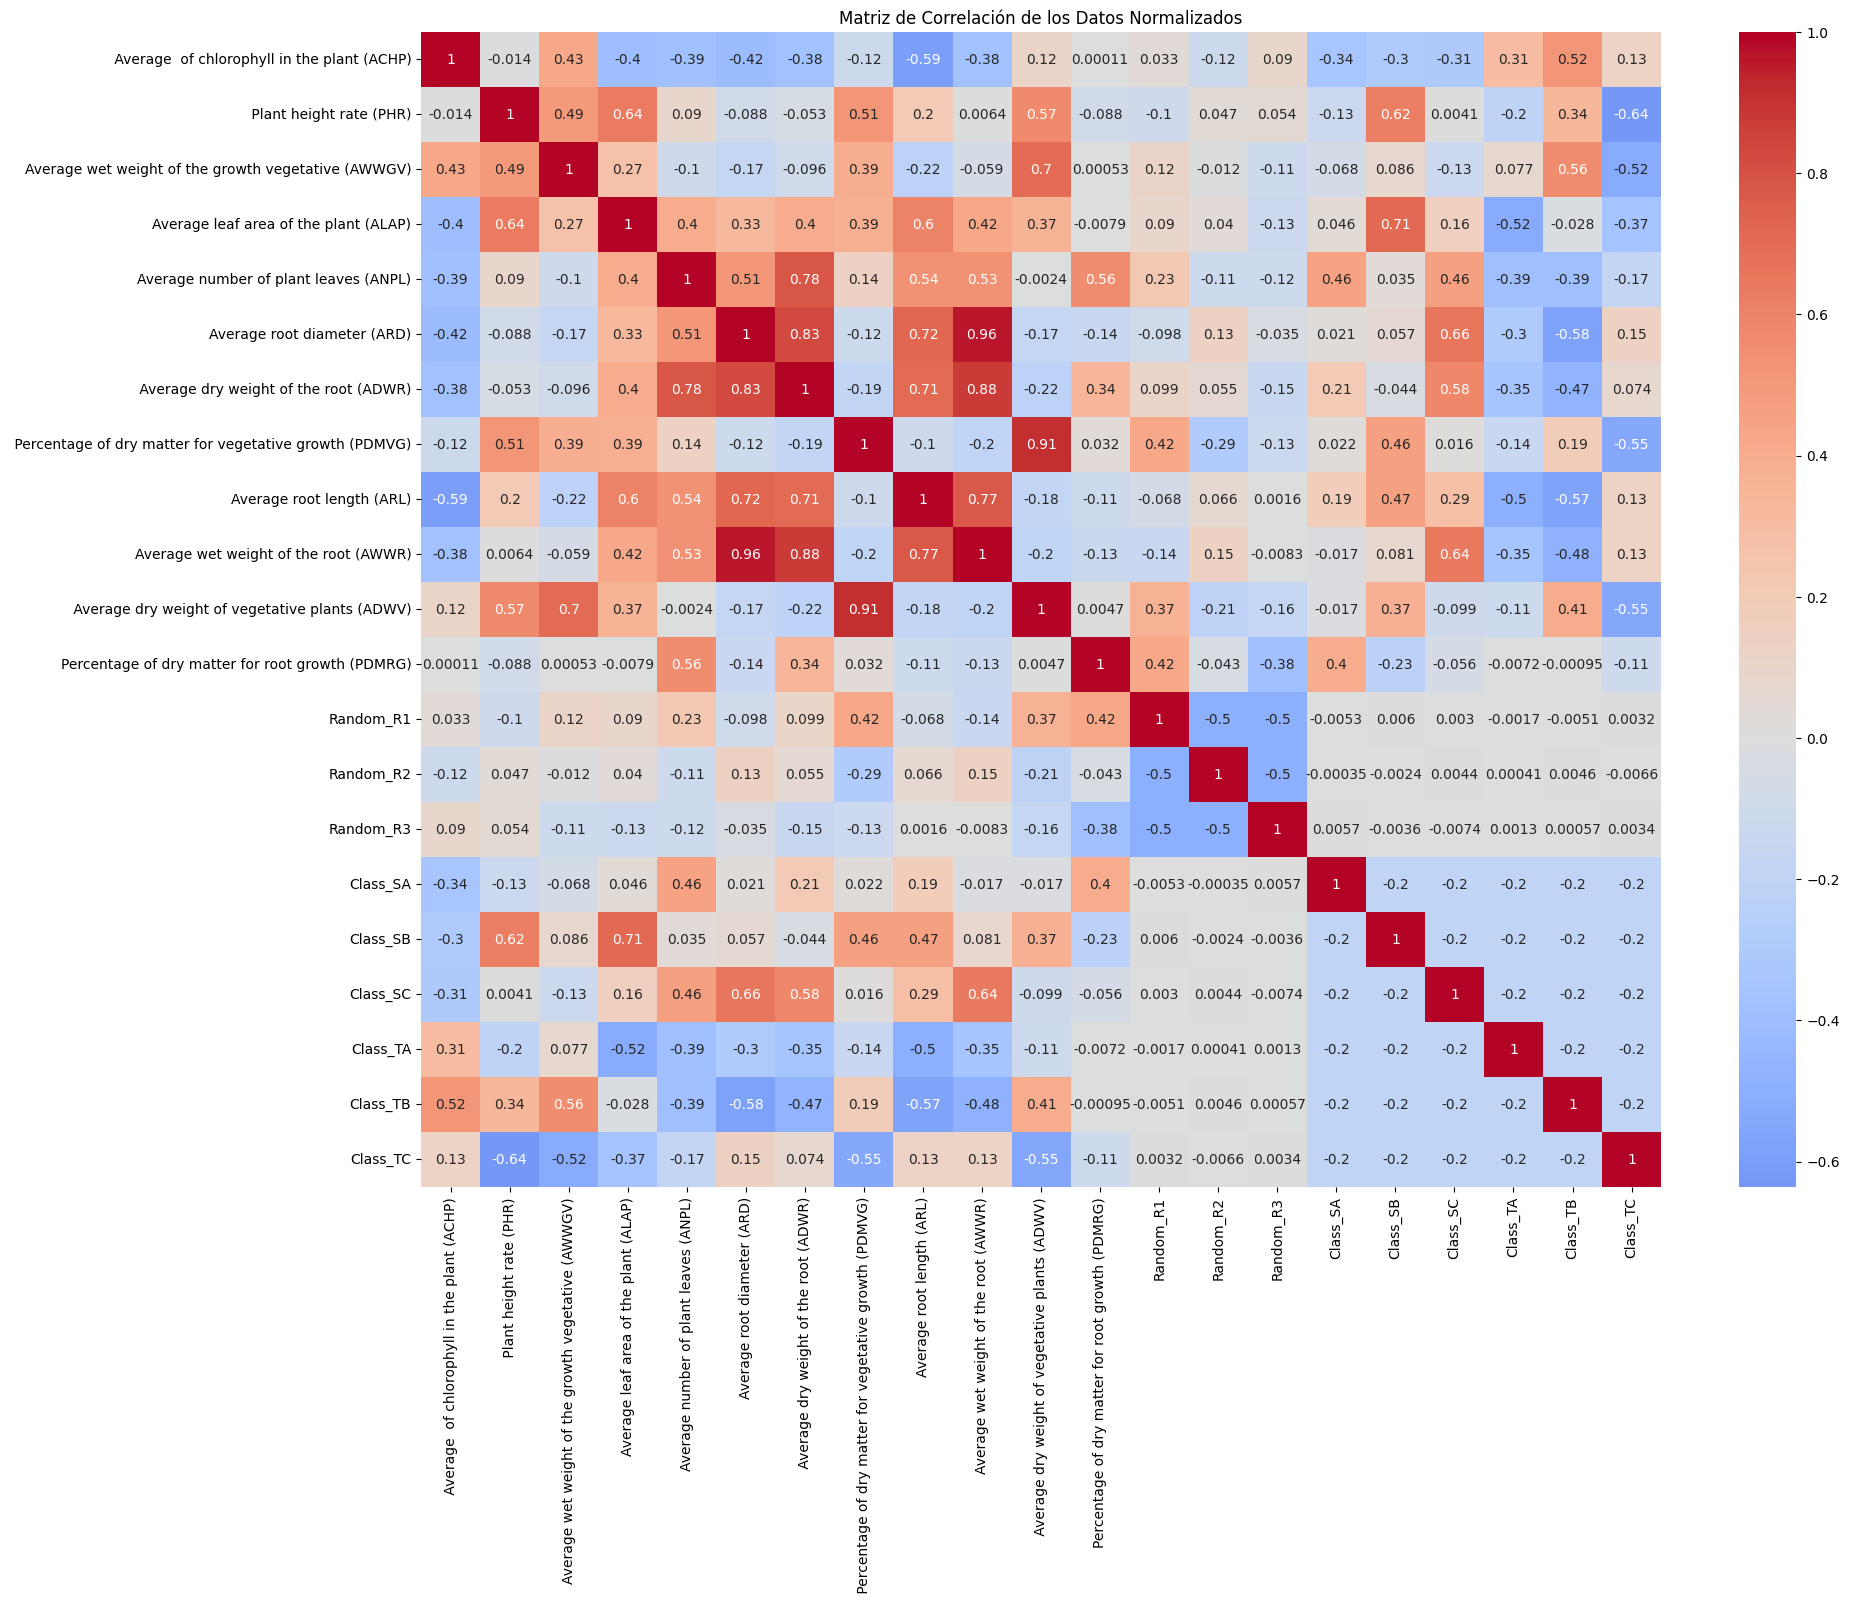

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar el DataFrame original
# raw_data = pd.read_csv('nombre_del_archivo.csv')  # Ejemplo de carga de datos

# Aplicar one-hot encoding a las columnas categóricas
encoded_data = pd.get_dummies(raw_data, drop_first=False)  # Codifica las columnas categóricas

# Asegurarse de que todas las columnas sean numéricas (conversión de True/False a 1/0)
encoded_data = encoded_data.astype(float)

# Filtrar solo las columnas numéricas para la normalización
numerical_data = encoded_data.select_dtypes(include=['float64', 'int64'])

# Normalizar los datos usando StandardScaler
scaler = StandardScaler()
numerical_data_normalized = scaler.fit_transform(numerical_data)

# Crear un DataFrame de los datos normalizados, usando los mismos nombres de columnas
numerical_data_normalized = pd.DataFrame(numerical_data_normalized, columns=numerical_data.columns)

# Calcular la matriz de correlación de los datos normalizados
correlation_matrix = numerical_data_normalized.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación de los Datos Normalizados")
plt.show()


## Feature Selection

## Feature Engineering

In [162]:
# Algunas columnas contienen espacios antes del nombre y puede ser un problema.
raw_data.columns = raw_data.columns.str.strip()
raw_data.columns

Index(['Random', 'Average  of chlorophyll in the plant (ACHP)',
       'Plant height rate (PHR)',
       'Average wet weight of the growth vegetative (AWWGV)',
       'Average leaf area of the plant (ALAP)',
       'Average number of plant leaves (ANPL)', 'Average root diameter (ARD)',
       'Average dry weight of the root (ADWR)',
       'Percentage of dry matter for vegetative growth (PDMVG)',
       'Average root length (ARL)', 'Average wet weight of the root (AWWR)',
       'Average dry weight of vegetative plants (ADWV)',
       'Percentage of dry matter for root growth (PDMRG)', 'Class'],
      dtype='object')

## PCA:

## División de los datos

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = raw_data.drop('Class', axis=1)
y = raw_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


## Modelos

- PCA (Luis)
- Logistic Regression (Luis)
- SVM (Jaime)
- Random Forest (Luis)
- Decission Tree (Boosting) (Jaime)
- Enssemble Models (Final)
- UMAP (Jaime)
- Clustering: K-means (Luis)
- Clustering: Jerarquico (Jaime)
- K-NN (Quien no tenga nada que hacer)

### Logistic Reggresion

### SVM

Exactitud del modelo: 100.00%

Reporte de Clasificación:
               precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1243
          SB       1.00      1.00      1.00      1272
          SC       1.00      1.00      1.00      1276
          TA       1.00      1.00      1.00      1200
          TB       1.00      1.00      1.00      1284
          TC       1.00      1.00      1.00      1225

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



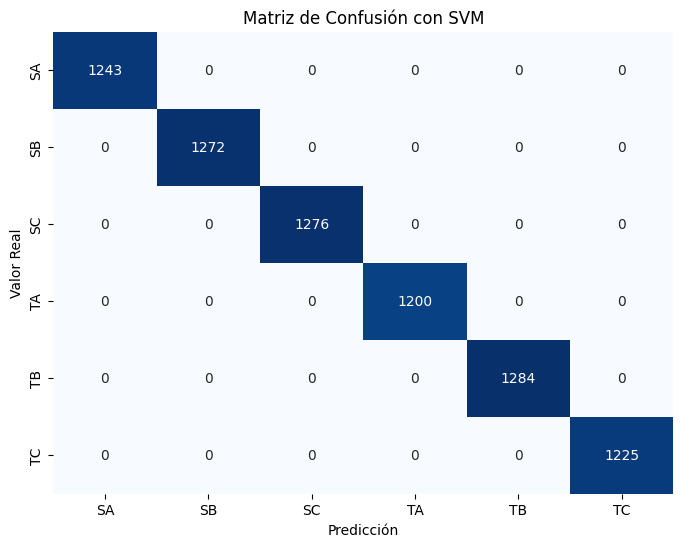

In [46]:
# Importar las bibliotecas necesarias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Seleccionar solo las columnas numéricas de X
X_numerico = X.select_dtypes(include=['number'])

# Dividir el conjunto de datos con solo las columnas numéricas
X_train, X_test, y_train, y_test = train_test_split(X_numerico, y, test_size=0.25, random_state=42)

# Estandarizar las características (recomendado para SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
class_labels = sorted(set(y))
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión con SVM')
plt.show()


### Random Forest

### Decission Tree

Exactitud del modelo: 1.0
Reporte de clasificación:
               precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1243
          SB       1.00      1.00      1.00      1272
          SC       1.00      1.00      1.00      1276
          TA       1.00      1.00      1.00      1200
          TB       1.00      1.00      1.00      1284
          TC       1.00      1.00      1.00      1225

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



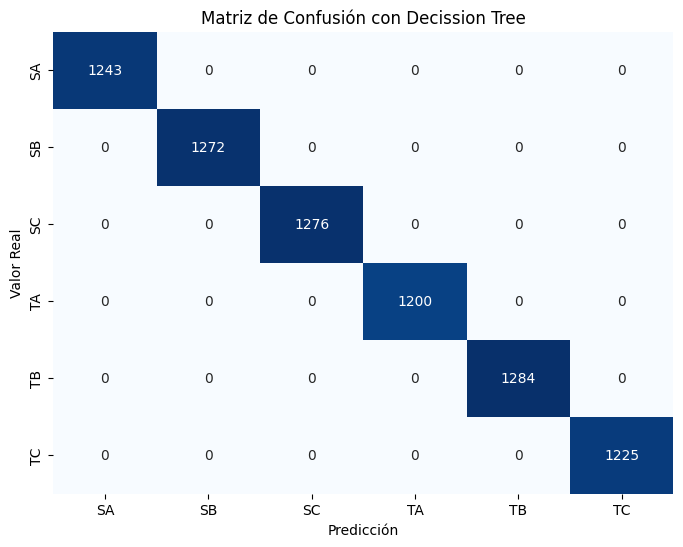

In [66]:
# Seleccionar solo las columnas numéricas de X
X_numerico = X.select_dtypes(include=['number'])

# Dividir el conjunto de datos con solo las columnas numéricas
X_train, X_test, y_train, y_test = train_test_split(X_numerico, y, test_size=0.25, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)

# Hacer predicciones y evaluar
y_pred = modelo_arbol.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
reporte = classification_report(y_test, y_pred)

print("Exactitud del modelo:", accuracy)
print("Reporte de clasificación:\n", reporte)

# Obtener predicciones (interpretadas como valores enteros si las clases son numéricas)
y_pred = modelo_arbol.predict(X_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
class_labels = sorted(set(y))
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión con Decission Tree')
plt.show()

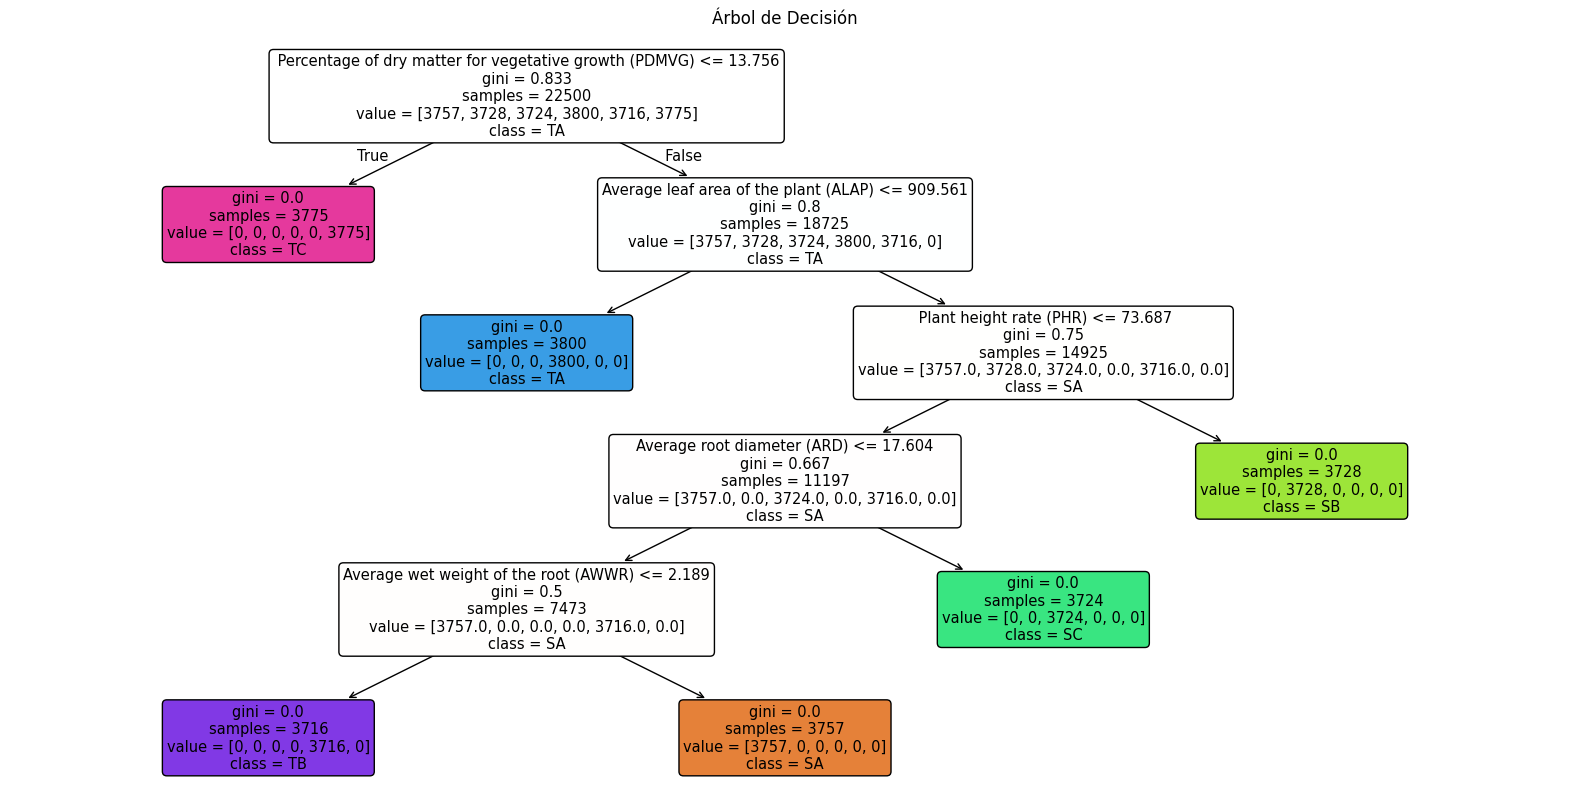

In [78]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(modelo_arbol, filled=True, rounded=True, feature_names=X_train.columns, class_names=modelo_arbol.classes_)
plt.title("Árbol de Decisión")
plt.show()


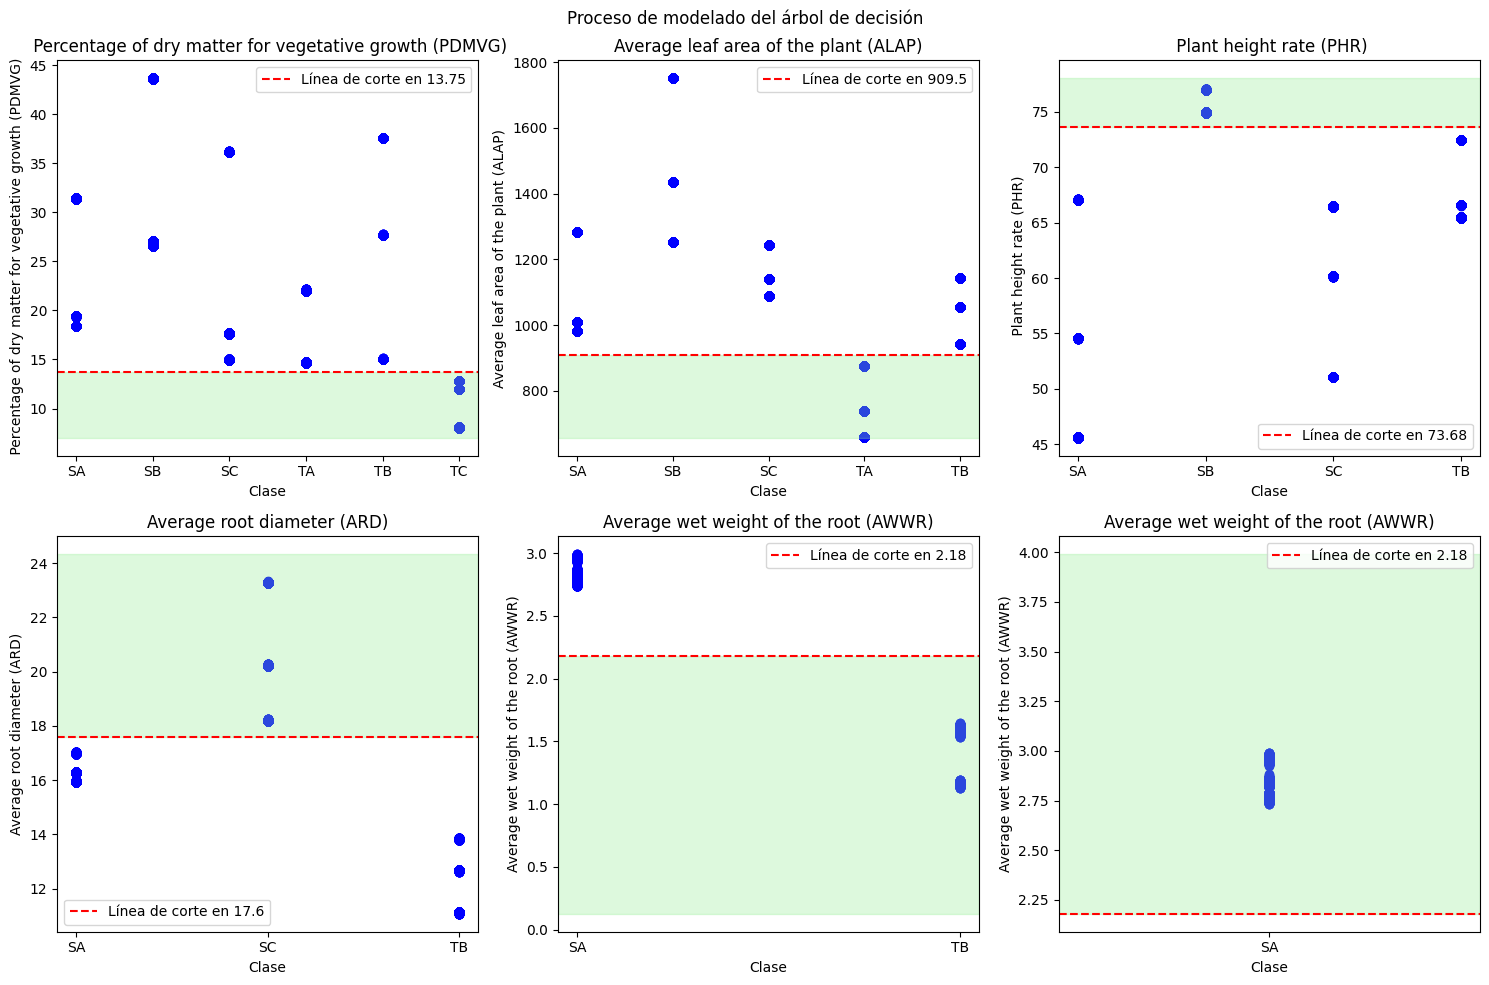

In [101]:
import matplotlib.pyplot as plt

# Crear la figura y los subplots 2x3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Definir las clases y las columnas de interés junto con los valores de corte
clases = ['TC', 'TA', 'SB', 'SC', 'TB', 'SA']
columnas = [
    'Percentage of dry matter for vegetative growth (PDMVG)',
    'Average leaf area of the plant (ALAP)',
    'Plant height rate (PHR)',
    'Average root diameter (ARD)',
    'Average wet weight of the root (AWWR)',
    'Average wet weight of the root (AWWR)'
]
lineas_de_corte = [13.75, 909.5, 73.68, 17.6, 2.18, 2.18]
color_above = [False, False, True, True, False, True]  # True para colorear por encima, False para por debajo


# Crear los scatter plots en cada subplot
for i, ax in enumerate(axs.flat):
    # Filtrar los datos eliminando clases progresivamente
    filtered_data = raw_data[~raw_data['Class'].isin(clases[:i])]
    
    # Scatter plot para la variable correspondiente y datos filtrados
    ax.scatter(filtered_data['Class'], filtered_data[columnas[i]], color='b')
    
    # Línea de corte específica para cada subplot
    corte = lineas_de_corte[i]
    ax.axhline(y=corte, color='r', linestyle='--', label=f'Línea de corte en {corte}')

    # Relleno completo en el fondo del gráfico
    if color_above[i]:  # Colorear por encima de la línea de corte
        ax.axhspan(corte, (filtered_data[columnas[i]].max()+1), color='lightgreen', alpha=0.3)
    else:  # Colorear por debajo de la línea de corte
        ax.axhspan((filtered_data[columnas[i]].min()-1), corte, color='lightgreen', alpha=0.3)

    # Personalización del subplot
    ax.set_xlabel('Clase')
    ax.set_ylabel(columnas[i])
    ax.set_title(f'{columnas[i]}')
    ax.legend()

# Ajustar el layout para evitar superposición de etiquetas
plt.suptitle("Proceso de modelado del árbol de decisión")
plt.tight_layout()
plt.show()


Después de ver estos resultados, se podría hacer una reducción de la dimensionalidad del dataset dejando solo las 5 variables que usa decission tree para la clasificación de las plantas. Estas variables sería: 'Percentage of dry matter for vegetative growth (PDMVG)', 'Average leaf area of the plant (ALAP)', 'Plant height rate (PHR)', 'Average root diameter (ARD)', 'Average wet weight of the root (AWWR)' y 'Average wet weight of the root (AWWR)'. Incluso, viendo el anterior proceso del árbol de decisión en la etapa de 'Average root diameter (ARD)', añadiendo otro corte al gráfico se podría clasificar igualemente los grupos restantes. Por lo que se podría reducir el dataset incluso a unicamente 4 variables. 

### K-NN

Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1243
          SB       1.00      1.00      1.00      1272
          SC       1.00      1.00      1.00      1276
          TA       1.00      1.00      1.00      1200
          TB       1.00      1.00      1.00      1284
          TC       1.00      1.00      1.00      1225

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



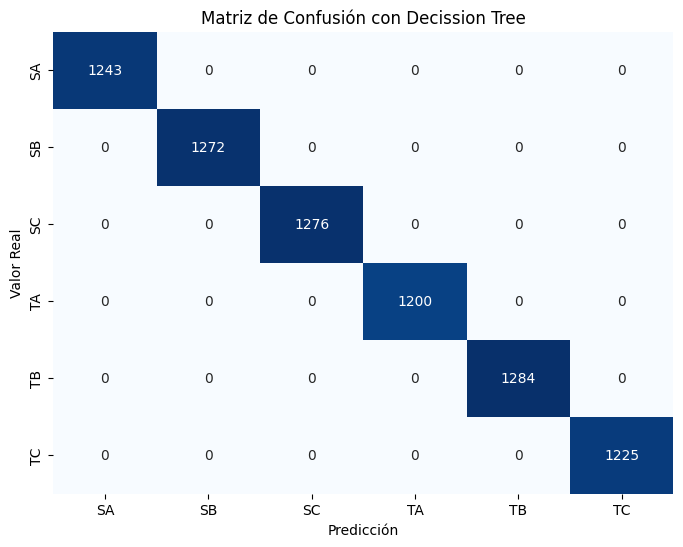

In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Seleccionar solo las columnas numéricas de X
X_numerico = X.select_dtypes(include=['number'])

# Dividir el conjunto de datos con solo las columnas numéricas
X_train, X_test, y_train, y_test = train_test_split(X_numerico, y, test_size=0.25, random_state=42)

# Escalar las características para mejorar el rendimiento de KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo KNN
knn = KNeighborsClassifier(n_neighbors=6)

# Entrenar el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Visualizar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
class_labels = sorted(set(y))
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión con Decission Tree')
plt.show()



### UMAP

UMAP (Uniform Manifold Approximation and Projection) es una técnica de reducción de dimensionalidad utilizada para proyectar datos de alta dimensión en un espacio de menor dimensión (generalmente 2D o 3D) preservando la estructura local y global de los datos originales.

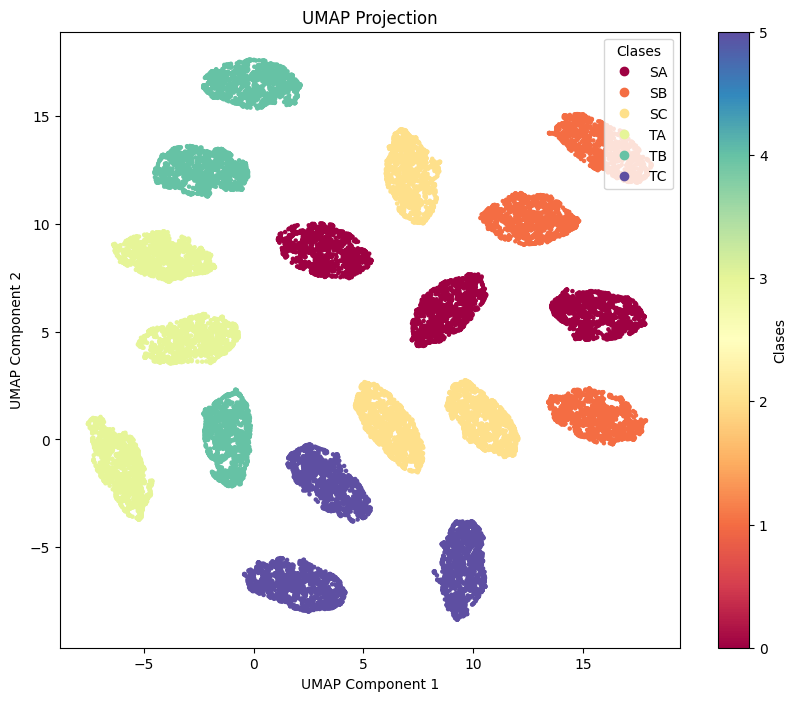

In [116]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_numerico)

# Configura UMAP
reducer = umap.UMAP(n_neighbors=6, min_dist=0.1, n_components=2, random_state=42)

# Ajustar UMAP a los datos
embedding = reducer.fit_transform(data_scaled)

# Convertir etiquetas de texto a números para hacer el gráfico
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)

# Obtener las etiquetas de clase
classes = label_encoder.classes_

# Crear el gráfico con leyenda
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    embedding[:, 0], embedding[:, 1], c=y_numeric, cmap='Spectral', s=5
)
plt.colorbar(label='Clases')  # Agrega la barra de color con el nombre de clases
plt.title('UMAP Projection')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# Crear leyenda personalizada para clases
handles, _ = scatter.legend_elements(prop="colors")
legend_labels = [f"{classes[i]}" for i in range(len(classes))]
plt.legend(handles, legend_labels, title="Clases", loc="upper right")

plt.show()


Se puede observar como las clases pertenecientes al grupo "S" están en una región y las clases del grupo "T" están en otra diferenciada. Hay patrones muy bien demarcados, pero dentro de las grupos de clases "T" y "S" están entremezclados, exceptuando la clase "TC" la cual está agrupada.

### Clustering

#### Jerarquico

Estamos trabajando con un dataset de plantas. En el mundo de la biología es ampliamente conocido el uso de los dendrogramas para agrupar especies por rasgos o características, dando lugar al campo de la taxonomía. En esta parte del trabajo eliminaremos la columna "Class" e intentaremos clustrizar los datos en grupos de 6 para ver si mediante entrenamiento no supervisado se puede llegar a las clases originales del dataset. Si no se consiguiera obtener los resultados de las clases de manera perfecta, este método también sería útil en la biología para poder catalogar familias de plantas mediante sus características.

En esta sección de clustering jerárquico hemos optado por usar el método de "ward" en la construcción del dendrograma porque es el que produce una visualización más limpia y estructurada. El método de Ward minimiza la varianza dentro de cada cluster en cada etapa, generando agrupaciones compactas y homogéneas. Esto resulta en un dendrograma donde las distancias entre clusters están mejor representadas, facilitando la interpretación visual de la estructura jerárquica de los datos.

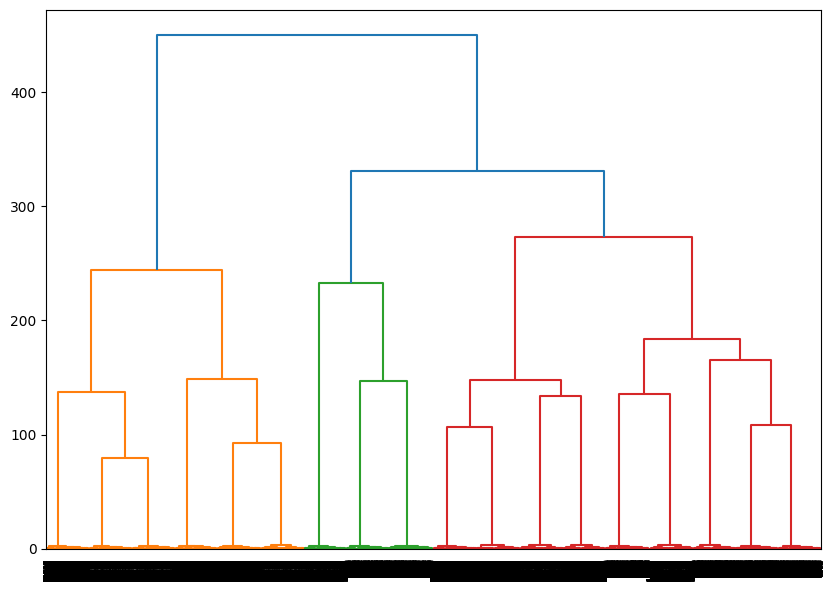

In [108]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X_numerico_cluster = X.select_dtypes(include=['number'])

# Supongamos que tu dataset es 'df'
df_scaled = StandardScaler().fit_transform(X_numerico_cluster)  # Escalamiento

# Clustering jerárquico usando Ward
Z = linkage(df_scaled, method='ward')

# Dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()

# Dividir en clusters
clusters = fcluster(Z, 6, criterion='maxclust')
df_con_clusters = raw_data.copy()
df_con_clusters['cluster'] = clusters


Ahora, una vez estructurados los datos en clusters podemos ver como se reparten cada clase en cada cluster y ver como de bien está funcionando el clustering con respecto a las clases iniciales, para ello generamos una tabla de contingencia.

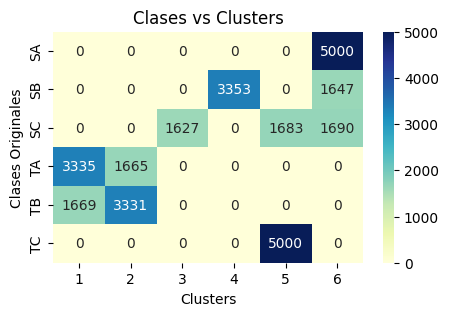

In [114]:
# Comparar clusters con las clases originales 
if 'Class' in df_con_clusters.columns:
    # Crear la tabla de contingencia
    tabla_contingencia = pd.crosstab(df_con_clusters['Class'], df_con_clusters['cluster'])

    # Visualización con heatmap
    plt.figure(figsize=(5, 3))
    sns.heatmap(tabla_contingencia, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
    plt.title('Clases vs Clusters')
    plt.xlabel('Clusters')
    plt.ylabel('Clases Originales')
    plt.show()
else:
    print("No se encontró la columna 'Class' en el dataset original.")

Aplicamos la tabla para cada método de clustering jerarquico que nos aporta la función `linkage()` y vemos cual nos ofrece mejores resultados. 

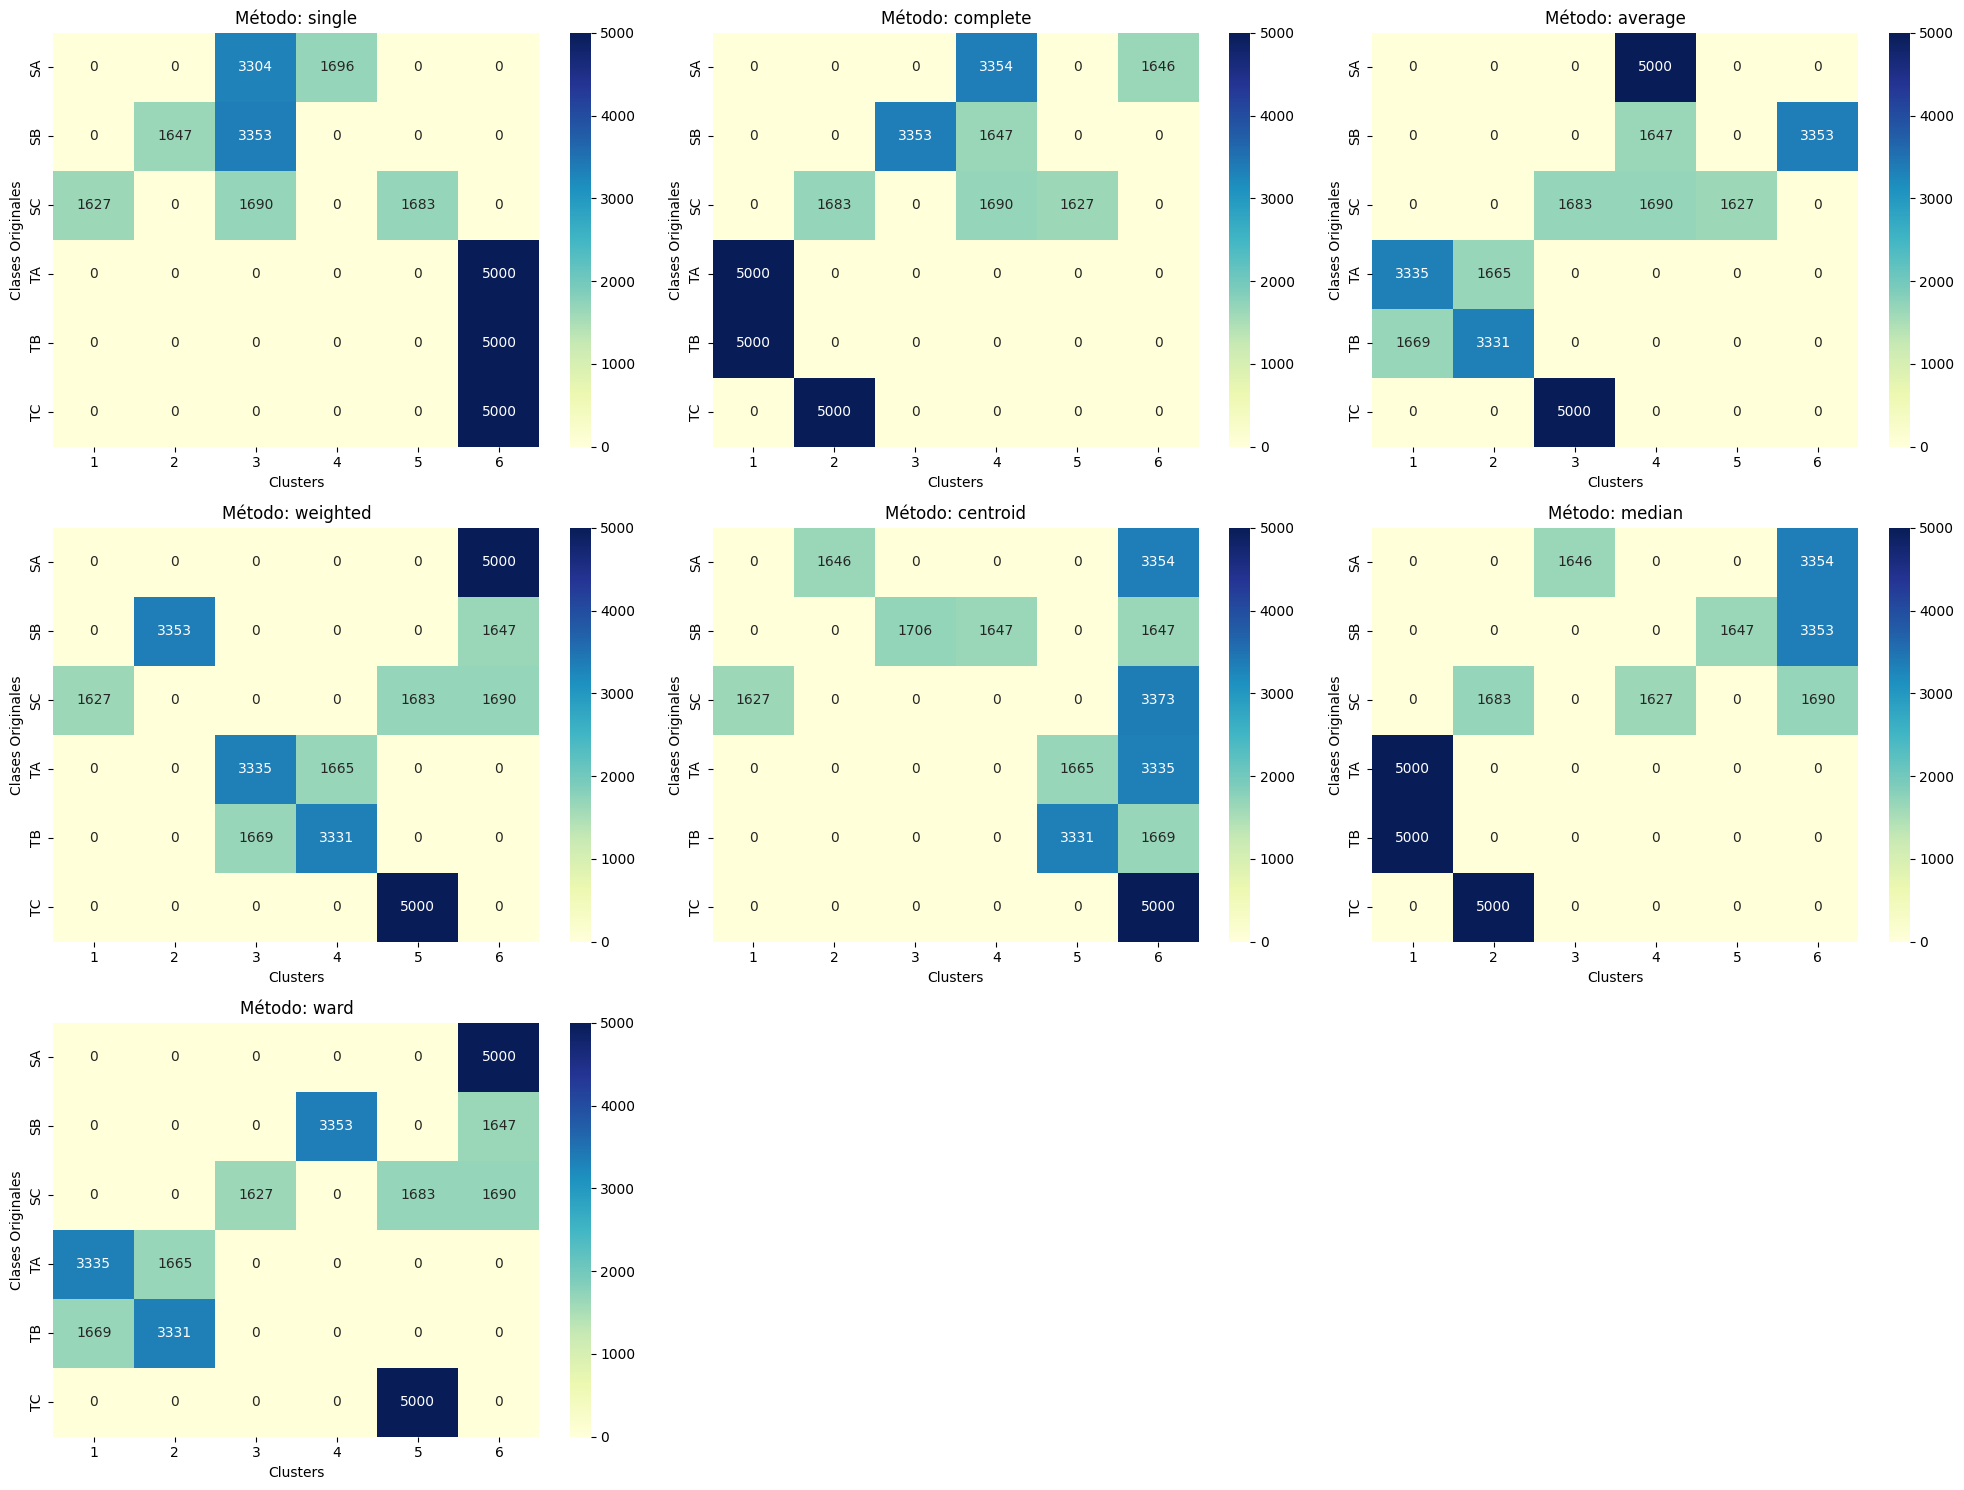

In [115]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import math

# Seleccionamos las columnas numéricas
X_numerico_cluster = X.select_dtypes(include=['number']).copy()

# Escalar los datos
df_scaled = StandardScaler().fit_transform(X_numerico_cluster)

# Lista de métodos para linkage
metodos = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

# Crear una copia del dataset original con las clases
df_con_clusters = raw_data.copy()

# Configurar el tamaño y la disposición de los subplots dinámicamente
n_metodos = len(metodos)
n_cols = 3
n_rows = math.ceil(n_metodos / n_cols)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# Iterar sobre cada método y crear el heatmap correspondiente
for i, metodo in enumerate(metodos):
    # Clustering jerárquico con el método actual
    Z = linkage(df_scaled, method=metodo)
    
    # Asignar clusters (en este caso, dividimos en 6 clusters; ajusta según necesidad)
    clusters = fcluster(Z, 6, criterion='maxclust')
    
    # Agregar los clusters al DataFrame
    df_con_clusters['cluster'] = clusters
    
    # Tabla de contingencia entre clusters y clase original
    if 'Class' in df_con_clusters.columns:
        tabla_contingencia = pd.crosstab(df_con_clusters['Class'], df_con_clusters['cluster'])
        
        # Heatmap en el subplot correspondiente
        sns.heatmap(tabla_contingencia, annot=True, fmt='d', cmap='YlGnBu', cbar=True, ax=axes[i])
        axes[i].set_title(f'Método: {metodo}')
        axes[i].set_xlabel('Clusters')
        axes[i].set_ylabel('Clases Originales')
    else:
        print("No se encontró la columna 'Class' en el dataset original.")

# Ocultar los subplots vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para una mejor visualización
plt.tight_layout()
plt.show()


A la vista de estos resultados se puede ver como en cualquier tipo de clustering jerárquico, sea cual sea el método aplicado, vemos una fuerte tendencia a agrupar las clases que comienzan con la letra "S" por un lado y las que empiezan con la letra "T" por otro. Además hay otra tendencia que se puede observar en algunos casos y es un agrupamiento de las clases que terminan por la letra "C".

#### K-means

## Trabajar solo con 2 columnas obtenidas del decision tree:

In [163]:
# Lista de las columnas optimas
columnas_seleccionadas = ['Plant height rate (PHR)', 'Average wet weight of the root (AWWR)', 'Class']

# Filtramos el DataFrame para quedarnos solo con esas columnas
data_selected_dt = raw_data[columnas_seleccionadas]

Exactitud del modelo: 100.00%

Reporte de Clasificación:
               precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1243
          SB       1.00      1.00      1.00      1272
          SC       1.00      1.00      1.00      1276
          TA       1.00      1.00      1.00      1200
          TB       1.00      1.00      1.00      1284
          TC       1.00      1.00      1.00      1225

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



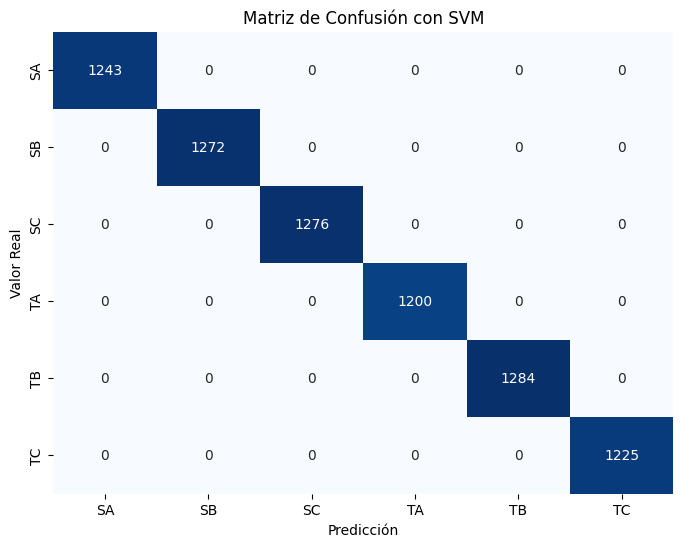

In [164]:
# Importar las bibliotecas necesarias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

X = data_selected_dt.drop('Class', axis=1)
y = data_selected_dt['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Seleccionar solo las columnas numéricas de X
X_numerico = X.select_dtypes(include=['number'])

# Dividir el conjunto de datos con solo las columnas numéricas
X_train, X_test, y_train, y_test = train_test_split(X_numerico, y, test_size=0.25, random_state=42)

# Estandarizar las características (recomendado para SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
class_labels = sorted(set(y))
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión con SVM')
plt.show()


Exactitud del modelo: 1.0
Reporte de clasificación:
               precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1243
          SB       1.00      1.00      1.00      1272
          SC       1.00      1.00      1.00      1276
          TA       1.00      1.00      1.00      1200
          TB       1.00      1.00      1.00      1284
          TC       1.00      1.00      1.00      1225

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



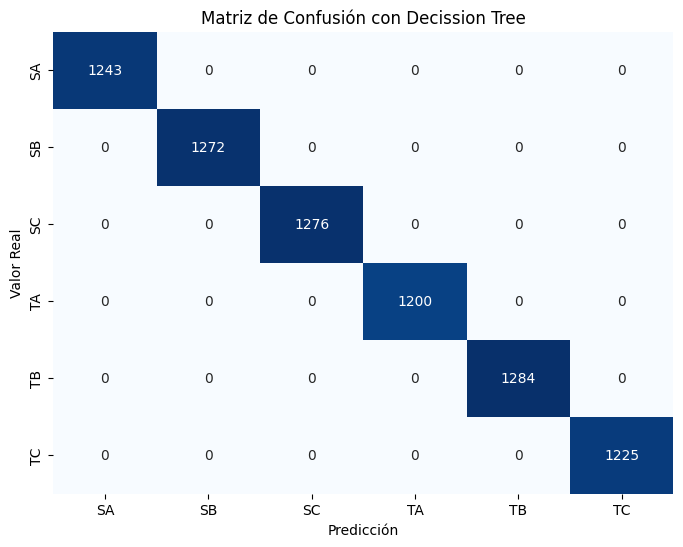

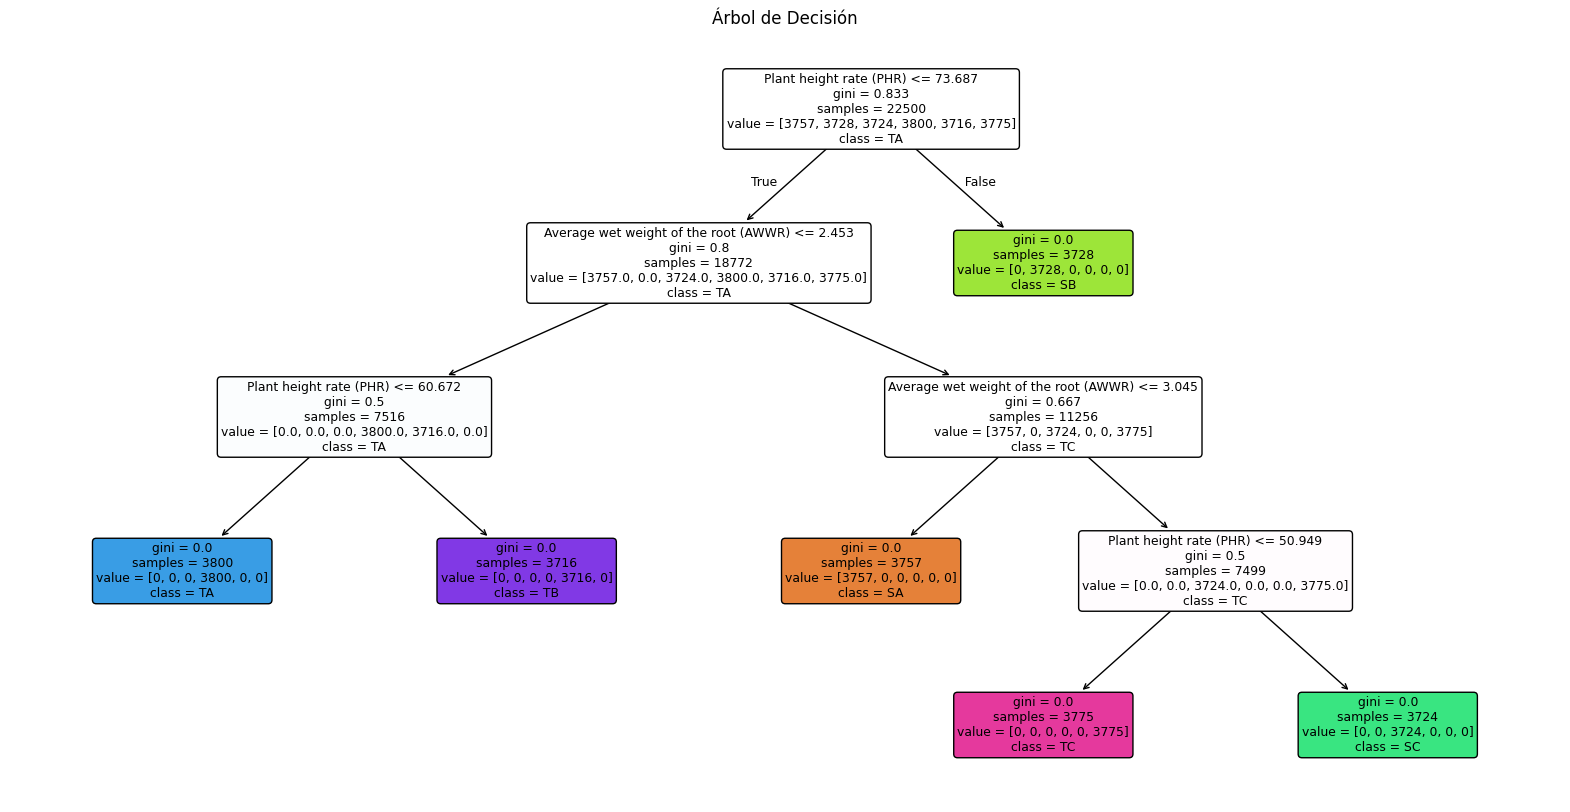

In [165]:
# Seleccionar solo las columnas numéricas de X
X_numerico = X.select_dtypes(include=['number'])

# Dividir el conjunto de datos con solo las columnas numéricas
X_train, X_test, y_train, y_test = train_test_split(X_numerico, y, test_size=0.25, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)

# Hacer predicciones y evaluar
y_pred = modelo_arbol.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
reporte = classification_report(y_test, y_pred)

print("Exactitud del modelo:", accuracy)
print("Reporte de clasificación:\n", reporte)

# Obtener predicciones (interpretadas como valores enteros si las clases son numéricas)
y_pred = modelo_arbol.predict(X_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
class_labels = sorted(set(y))
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión con Decission Tree')
plt.show()

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(modelo_arbol, filled=True, rounded=True, feature_names=X_train.columns, class_names=modelo_arbol.classes_)
plt.title("Árbol de Decisión")
plt.show()

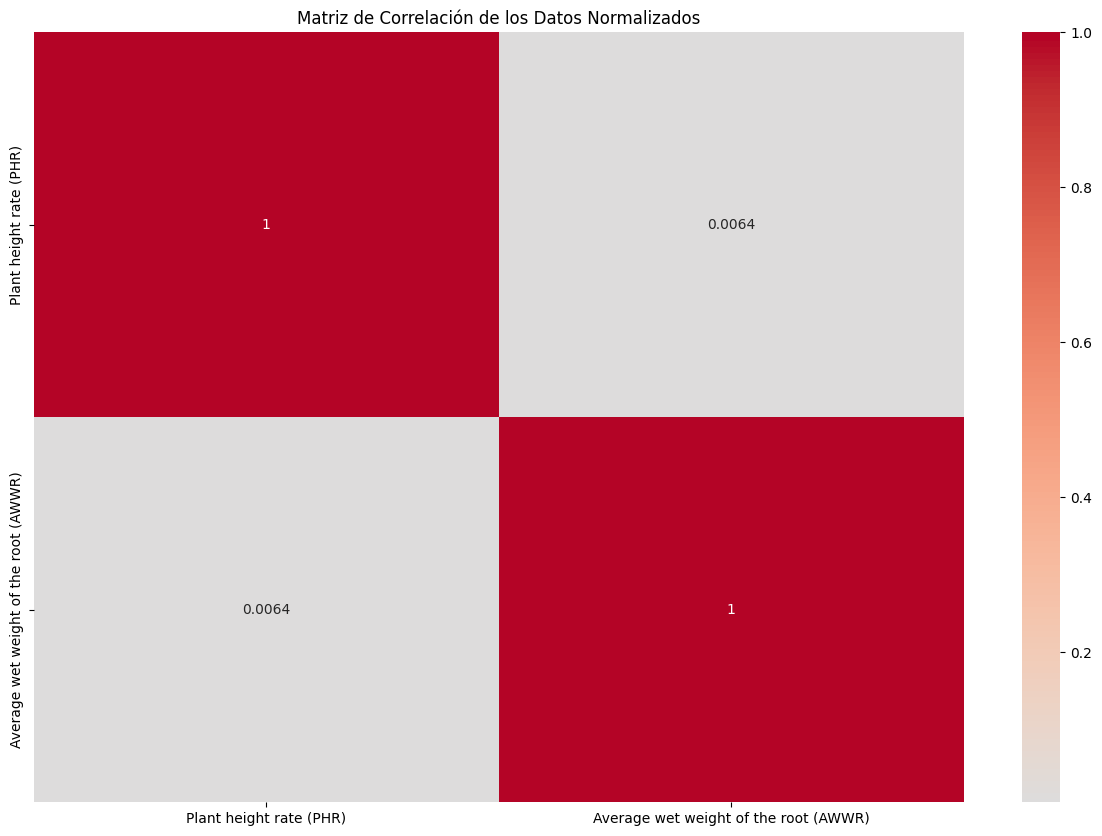

In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Filtrar solo las columnas numéricas
numerical_data = data_selected_dt.select_dtypes(include=['float64', 'int64'])

# Normalizar los datos (usando StandardScaler para estandarización)
scaler = StandardScaler()
numerical_data_normalized = scaler.fit_transform(numerical_data)

# Crear un DataFrame de los datos normalizados, usando los mismos nombres de columnas
numerical_data_normalized = pd.DataFrame(numerical_data_normalized, columns=numerical_data.columns)

# Calcular la matriz de correlación
correlation_matrix = numerical_data_normalized.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación de los Datos Normalizados")
plt.show()

Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1243
          SB       1.00      1.00      1.00      1272
          SC       1.00      1.00      1.00      1276
          TA       1.00      1.00      1.00      1200
          TB       1.00      1.00      1.00      1284
          TC       1.00      1.00      1.00      1225

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



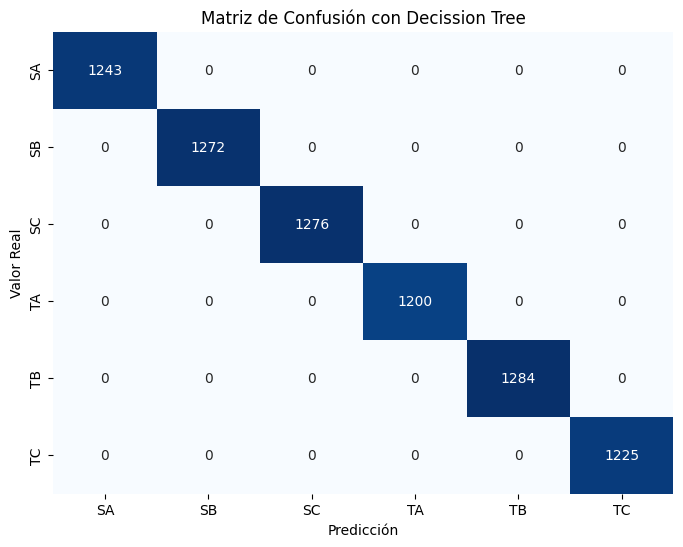

In [167]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Seleccionar solo las columnas numéricas de X
X_numerico = X.select_dtypes(include=['number'])

# Dividir el conjunto de datos con solo las columnas numéricas
X_train, X_test, y_train, y_test = train_test_split(X_numerico, y, test_size=0.25, random_state=42)

# Escalar las características para mejorar el rendimiento de KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo KNN
knn = KNeighborsClassifier(n_neighbors=6)

# Entrenar el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Visualizar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
class_labels = sorted(set(y))
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión con Decission Tree')
plt.show()



Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1243
           1       1.00      1.00      1.00      1272
           2       1.00      1.00      1.00      1276
           3       1.00      1.00      1.00      1200
           4       1.00      1.00      1.00      1284
           5       1.00      1.00      1.00      1225

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



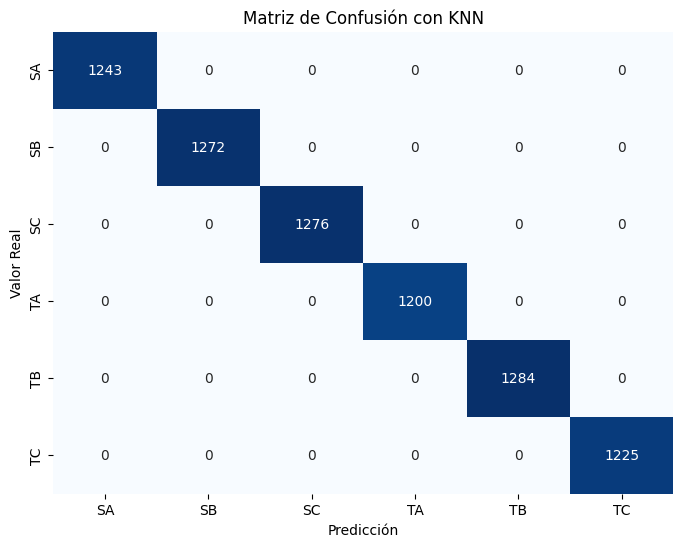

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

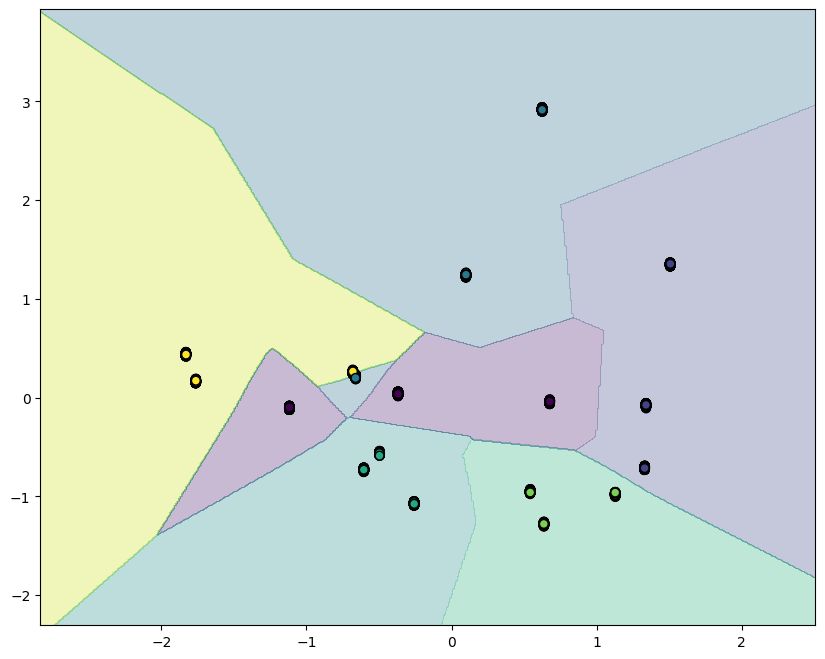

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convertir las etiquetas de clase en valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Seleccionar solo las columnas numéricas de X
X_numerico = X.select_dtypes(include=['number'])

# Dividir el conjunto de datos con solo las columnas numéricas
X_train, X_test, y_train, y_test = train_test_split(X_numerico, y_encoded, test_size=0.25, random_state=42)

# Escalar las características para mejorar el rendimiento de KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo KNN
knn = KNeighborsClassifier(n_neighbors=6)

# Entrenar el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualizar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
class_labels = label_encoder.inverse_transform(sorted(set(y_encoded)))  # Obtener etiquetas originales
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión con KNN')
plt.show()

# Visualización de la región de decisión (solo si hay dos características)
if X_numerico.shape[1] == 2:
    # Crear una malla de puntos para el gráfico
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Realizar predicciones en cada punto de la malla
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Generar el gráfico con la región de decisión
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

    # Graficar los puntos de datos
    scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=40, cmap='viridis')

    # Usar legend_elements() directamente para obtener los handles
    handles, _ = scatter.legend_elements()
    class_labels = label_encoder.inverse_transform(np.unique(y_train))  # Etiquetas originales de esas clases

    plt.legend(handles=handles, labels=class_labels, title="Clases")
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.title("Región de decisión del KNN")
    plt.show()


else:
    print("La visualización de la región de decisión solo es posible con dos características numéricas.")
